In [1]:
# Importing Dependencies
import os
import glob 
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
plt.style.use('seaborn-darkgrid')
#plt.style.use('dark_background')
plt.rc('figure', figsize=(52,30))
plt.rc('font', size=16)
plt.rc('lines', markersize=16)
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
 



In [2]:
# Importing my csv files
mask_df = pd.read_csv('world_mask_mandates.csv')
mask_df


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_combined_numeric,C1_combined,C2_combined_numeric,C2_combined,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,0,0.0,0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,0,0.0,0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,0,0.0,0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,0,0.0,0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238363,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20220129,0.0,0,0.0,0,...,40.74,40.74,49.52,49.52,40.1,40.1,45.83,45.83,0.0,0.0
238364,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20220130,0.0,0,0.0,0,...,40.74,40.74,49.52,49.52,40.1,40.1,45.83,45.83,0.0,0.0
238365,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20220131,NaN,NaN,NaN,NaN,...,NaN,40.74,NaN,49.52,NaN,40.1,NaN,45.83,NaN,0.0
238366,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,20220201,NaN,NaN,NaN,NaN,...,NaN,40.74,NaN,49.52,NaN,40.1,NaN,45.83,NaN,0.0


In [3]:
# Importing my csv files
variants_data = pd.read_csv('covid-variants.csv')
variants_data

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,7/6/2020,Alpha,0,0.0,3
1,Angola,7/6/2020,B.1.1.277,0,0.0,3
2,Angola,7/6/2020,B.1.1.302,0,0.0,3
3,Angola,7/6/2020,B.1.1.519,0,0.0,3
4,Angola,7/6/2020,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,11/1/2021,Omicron,0,0.0,6
100412,Zimbabwe,11/1/2021,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,11/1/2021,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,11/1/2021,others,0,0.0,6


In [4]:
# re-indexing the data frame with location
variants_data.set_index("location", inplace = True)
variants_data_df = pd.DataFrame(variants_data)
variants_data_df

,date,variant,num_sequences,perc_sequences,num_sequences_total
location,,,,,
Angola,7/6/2020,Alpha,0,0.0,3
Angola,7/6/2020,B.1.1.277,0,0.0,3
Angola,7/6/2020,B.1.1.302,0,0.0,3
Angola,7/6/2020,B.1.1.519,0,0.0,3
Angola,7/6/2020,B.1.160,0,0.0,3
...,...,...,...,...,...
Zimbabwe,11/1/2021,Omicron,0,0.0,6
Zimbabwe,11/1/2021,S:677H.Robin1,0,0.0,6
Zimbabwe,11/1/2021,S:677P.Pelican,0,0.0,6


In [5]:
# Creating a new data frame to only call the 6 countries needed for analysis
six_countries_df = variants_data_df.loc[["United States", "Canada", "Germany", "Sweden", "India", "Japan"]]
six_countries_df

,date,variant,num_sequences,perc_sequences,num_sequences_total
location,,,,,
United States,5/11/2020,Alpha,0,0.00,5804
United States,5/11/2020,B.1.1.277,0,0.00,5804
United States,5/11/2020,B.1.1.302,0,0.00,5804
United States,5/11/2020,B.1.1.519,0,0.00,5804
United States,5/11/2020,B.1.160,0,0.00,5804
...,...,...,...,...,...
Japan,12/27/2021,Omicron,118,77.12,153
Japan,12/27/2021,S:677H.Robin1,0,0.00,153
Japan,12/27/2021,S:677P.Pelican,0,0.00,153


In [6]:
# trying to graph the countries by variant to see how it looks


In [7]:
# Importing my csv files
covid_data = pd.read_csv('Covid_data6.csv')
covid_data

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,United States,5/11/2020,Alpha,0,0.00,5804
1,United States,5/11/2020,B.1.1.277,0,0.00,5804
2,United States,5/11/2020,B.1.1.302,0,0.00,5804
3,United States,5/11/2020,B.1.1.519,0,0.00,5804
4,United States,5/11/2020,B.1.160,0,0.00,5804
...,...,...,...,...,...,...
6355,Japan,12/27/2021,Omicron,118,77.12,153
6356,Japan,12/27/2021,S:677H.Robin1,0,0.00,153
6357,Japan,12/27/2021,S:677P.Pelican,0,0.00,153
6358,Japan,12/27/2021,others,0,0.00,153


In [8]:
# Merging 2 of all the csv files
merged_data = pd.merge(variants_data,covid_data, how = 'outer')
merged_data

,date,variant,num_sequences,perc_sequences,num_sequences_total,location
0,7/6/2020,Alpha,0,0.0,3,NaN
1,7/6/2020,Alpha,0,0.0,3,NaN
2,7/6/2020,Alpha,0,0.0,3,NaN
3,7/6/2020,Alpha,0,0.0,3,NaN
4,7/6/2020,Alpha,0,0.0,3,NaN
...,...,...,...,...,...,...
100411,11/1/2021,Omicron,0,0.0,6,NaN
100412,11/1/2021,S:677H.Robin1,0,0.0,6,NaN
100413,11/1/2021,S:677P.Pelican,0,0.0,6,NaN
100414,11/1/2021,others,0,0.0,6,NaN


## **************INTRODUCING A NEW GLOBAL DATA SET  BY POPULATION TO ANALYZE******************

In [9]:
# importing the global covid data csv
global_data = pd.read_csv('global_covid_data.csv')
global_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/20,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/20,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/20,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/20,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/20,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159548,ZWE,Africa,Zimbabwe,1/31/22,229666.0,206.0,160.714,5338.0,1.0,4.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
159549,ZWE,Africa,Zimbabwe,2/1/22,229851.0,185.0,153.571,5350.0,12.0,4.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
159550,ZWE,Africa,Zimbabwe,2/2/22,230012.0,161.0,152.714,5352.0,2.0,4.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
159551,ZWE,Africa,Zimbabwe,2/3/22,230170.0,158.0,153.429,5357.0,5.0,4.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [10]:
# re-indexing the data frame with location
global_data.set_index("location", inplace = True)

global_data

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Asia,2/24/20,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
Afghanistan,AFG,Asia,2/25/20,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
Afghanistan,AFG,Asia,2/26/20,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
Afghanistan,AFG,Asia,2/27/20,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
Afghanistan,AFG,Asia,2/28/20,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,ZWE,Africa,1/31/22,229666.0,206.0,160.714,5338.0,1.0,4.714,15217.559,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
Zimbabwe,ZWE,Africa,2/1/22,229851.0,185.0,153.571,5350.0,12.0,4.857,15229.817,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
Zimbabwe,ZWE,Africa,2/2/22,230012.0,161.0,152.714,5352.0,2.0,4.429,15240.485,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [11]:
# Creating a new data frame to only call the 6 countries needed for analysis
global_six_df = global_data.loc[["United States", "Canada", "Germany", "Sweden", "India", "Japan"]]
global_six_df

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
location,,,,,,,,,,,,,,,,,,,,,
United States,USA,North America,1/22/20,1.0,NaN,NaN,NaN,NaN,NaN,0.003,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
United States,USA,North America,1/23/20,1.0,0.0,NaN,NaN,NaN,NaN,0.003,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
United States,USA,North America,1/24/20,2.0,1.0,NaN,NaN,NaN,NaN,0.006,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
United States,USA,North America,1/25/20,2.0,0.0,NaN,NaN,NaN,NaN,0.006,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
United States,USA,North America,1/26/20,5.0,3.0,NaN,NaN,NaN,NaN,0.015,...,19.1,24.6,NaN,2.77,78.86,0.926,-8925.0,-3.59,-2.63,-26.808639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Japan,JPN,Asia,1/31/22,2738460.0,60858.0,74011.143,18812.0,48.0,41.143,21725.051,...,11.2,33.7,NaN,13.05,84.63,0.919,NaN,NaN,NaN,NaN
Japan,JPN,Asia,2/1/22,2820053.0,81593.0,76740.286,18882.0,70.0,45.000,22372.354,...,11.2,33.7,NaN,13.05,84.63,0.919,NaN,NaN,NaN,NaN
Japan,JPN,Asia,2/2/22,2914824.0,94771.0,80066.571,18964.0,82.0,51.857,23124.201,...,11.2,33.7,NaN,13.05,84.63,0.919,NaN,NaN,NaN,NaN


In [12]:
# Grouping by location, total_cases, and population to help graph infection rate per country over population density
group_six_cases_df = global_six_df.groupby(["location"]).agg({"total_cases":"sum"})


group_six_cases_df


,total_cases
location,
Canada,6.334565e+08
Germany,1.800036e+09
India,1.163488e+10
Japan,4.594657e+08
Sweden,4.496405e+08
United States,1.733343e+10


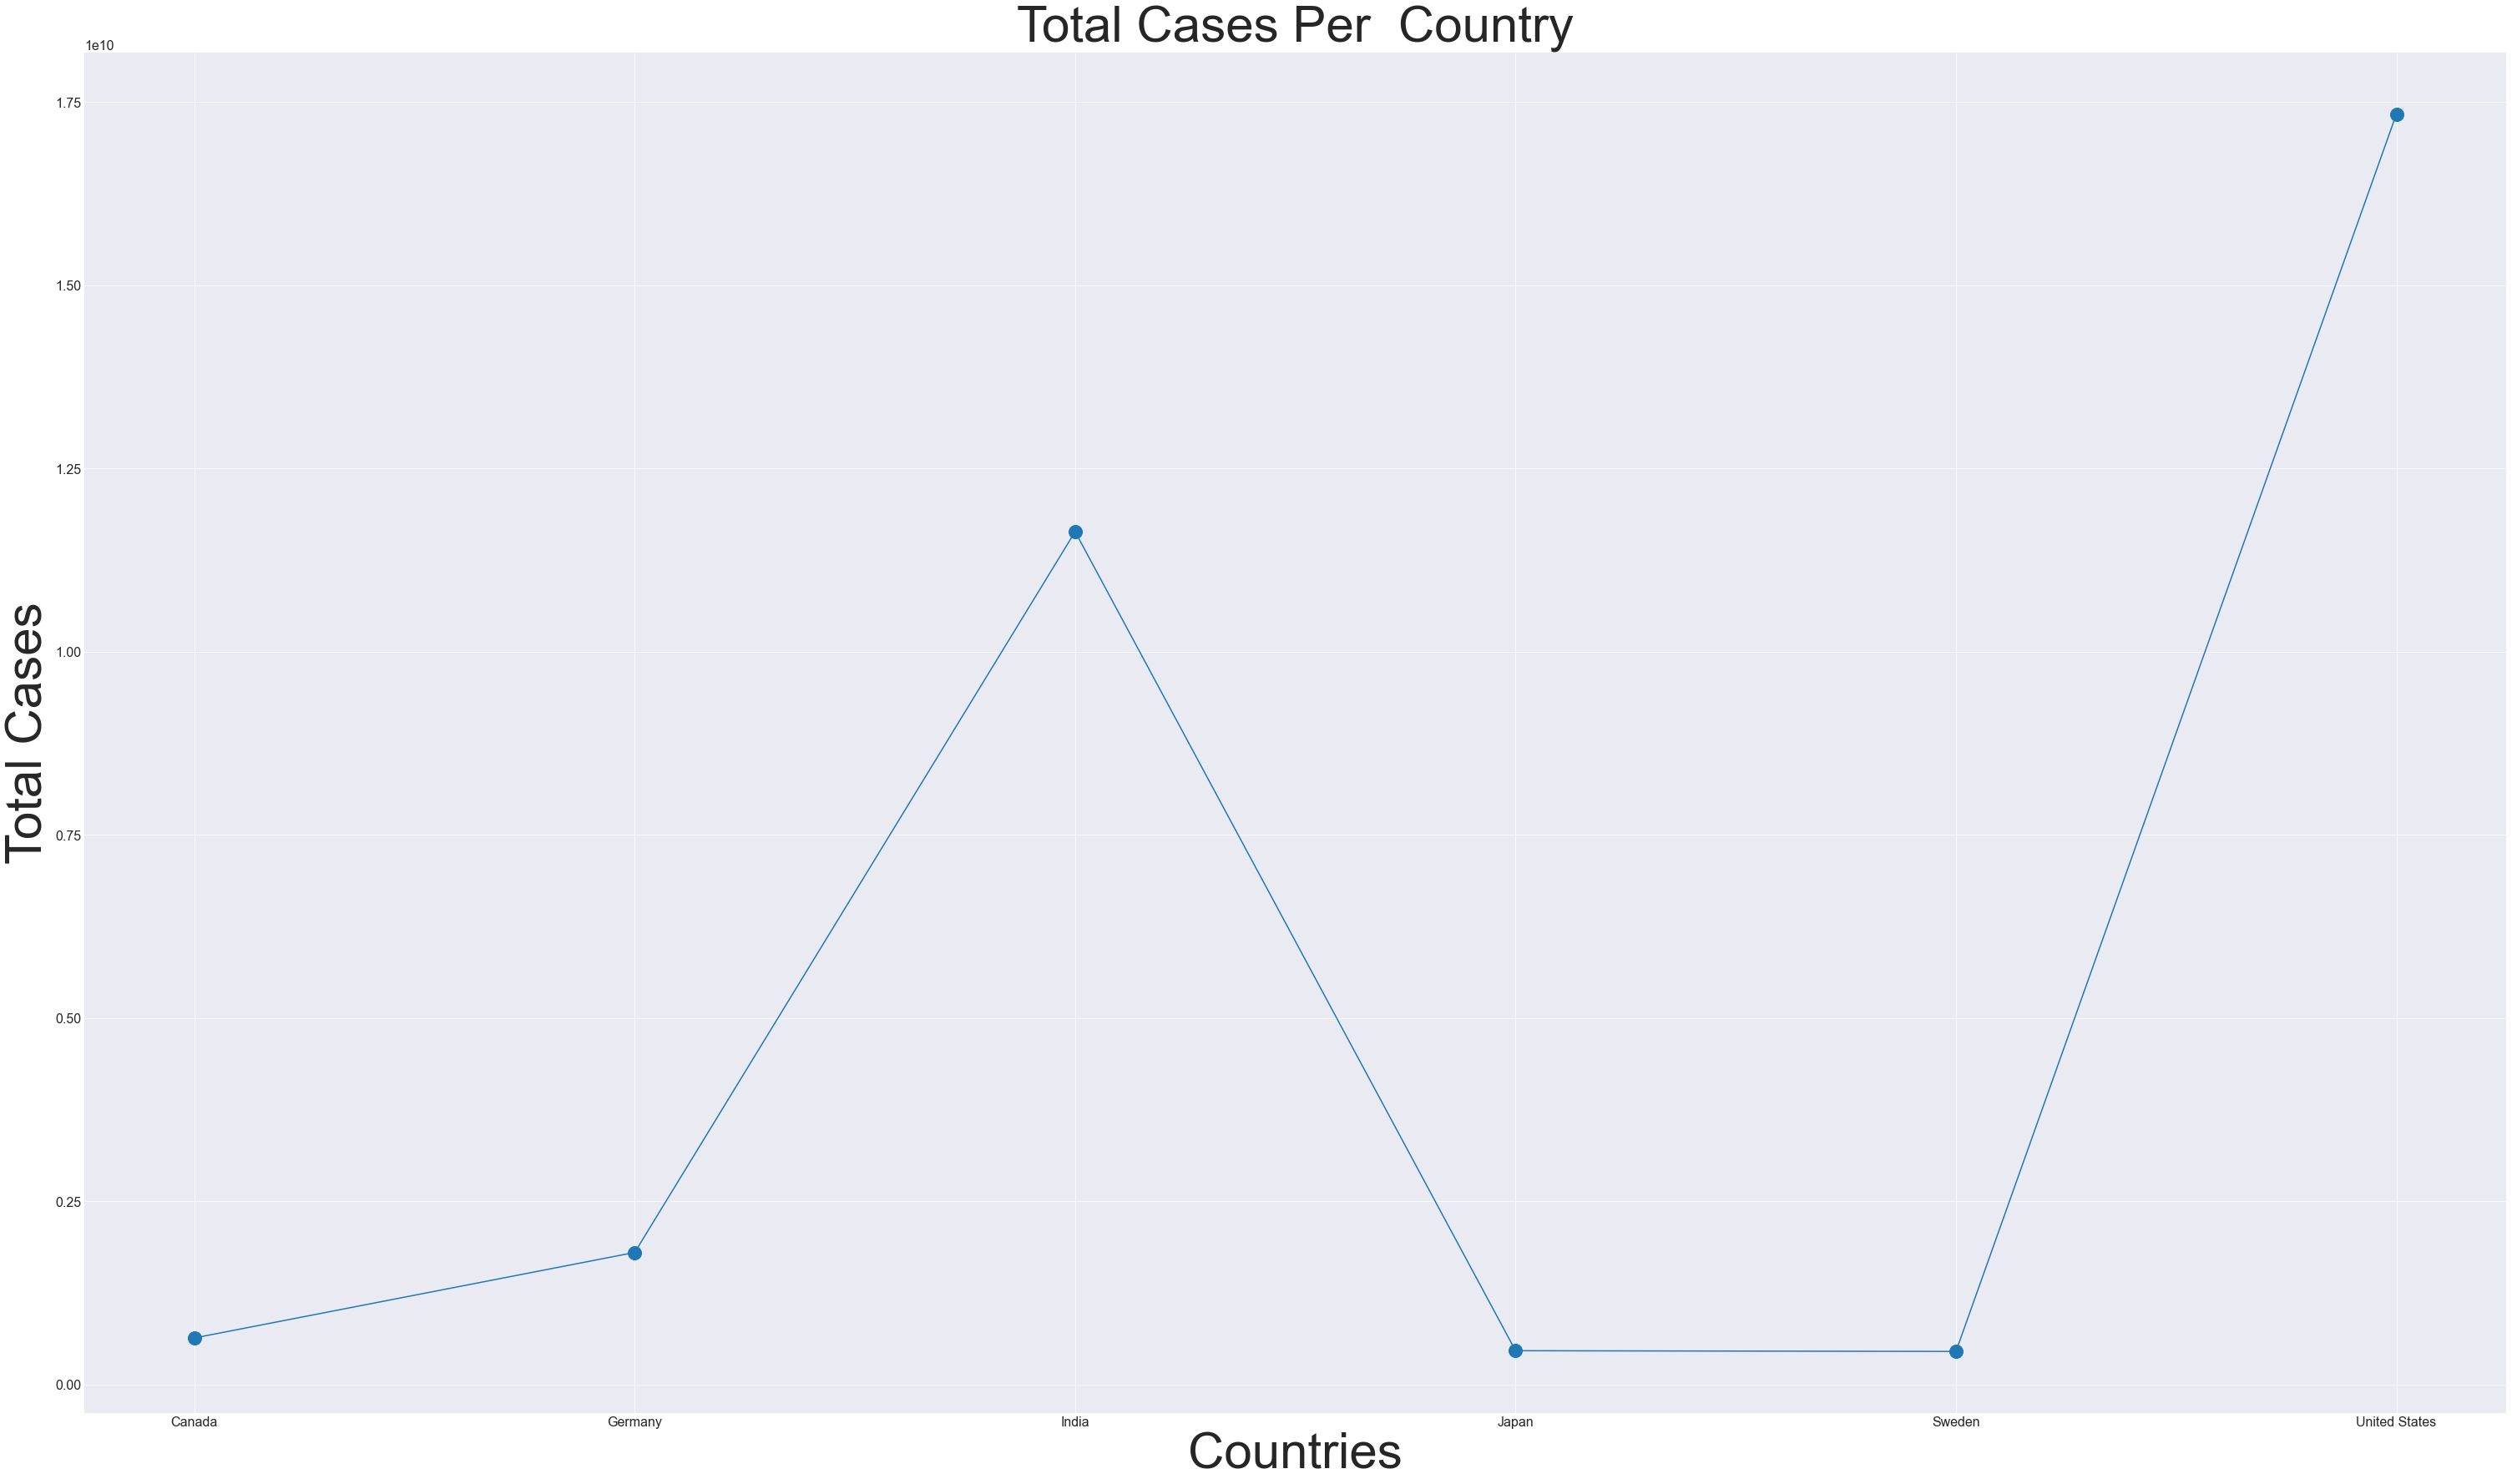

In [13]:
# Plotting line graph of total Covid cases per country
plt.plot(group_six_cases_df[["total_cases"]], marker = 'o')
plt.title('Total Cases Per  Country', fontsize=60)
plt.xlabel('Countries', fontsize=60)
plt.ylabel('Total Cases', fontsize=60)

plt.grid(True)
plt.savefig("Cases_by_Countries1.png")
plt.show()

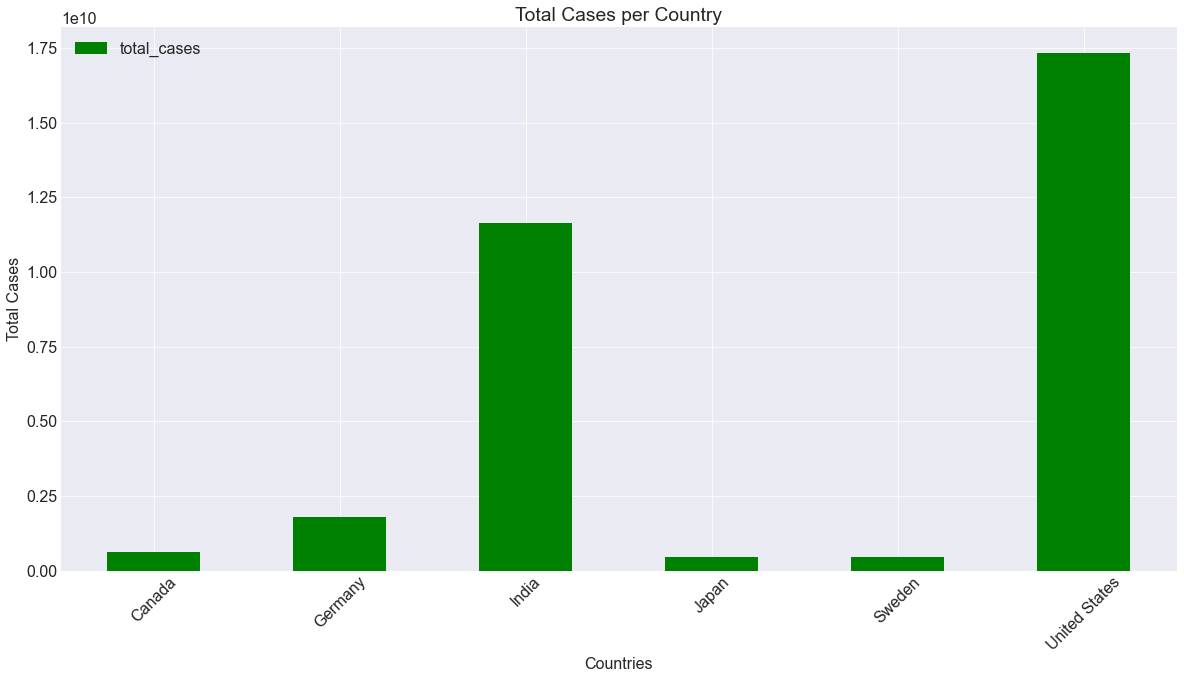

<Figure size 3744x2160 with 0 Axes>

In [14]:
# Generate a bar plot showing the total covid cases per country.
group_six_cases_df.plot(kind="bar", color="g", figsize=(20,10), rot=45)
plt.title("Total Cases per Country")
plt.ylabel("Total Cases")
plt.xlabel("Countries")
plt.rc("font", size=30)
plt.rc("lines", markersize=15)
plt.show()
plt.tight_layout()



In [15]:
# Grouping by location, total_deaths, and population to help graph infection rate per country over population density
group_six_deaths_df = global_six_df.groupby(["location"]).agg({"total_deaths":"sum"})

group_six_deaths_df

,total_deaths
location,
Canada,12795792.0
Germany,37976890.0
India,155657094.0
Japan,5824450.0
Sweden,7088061.0
United States,301478150.0


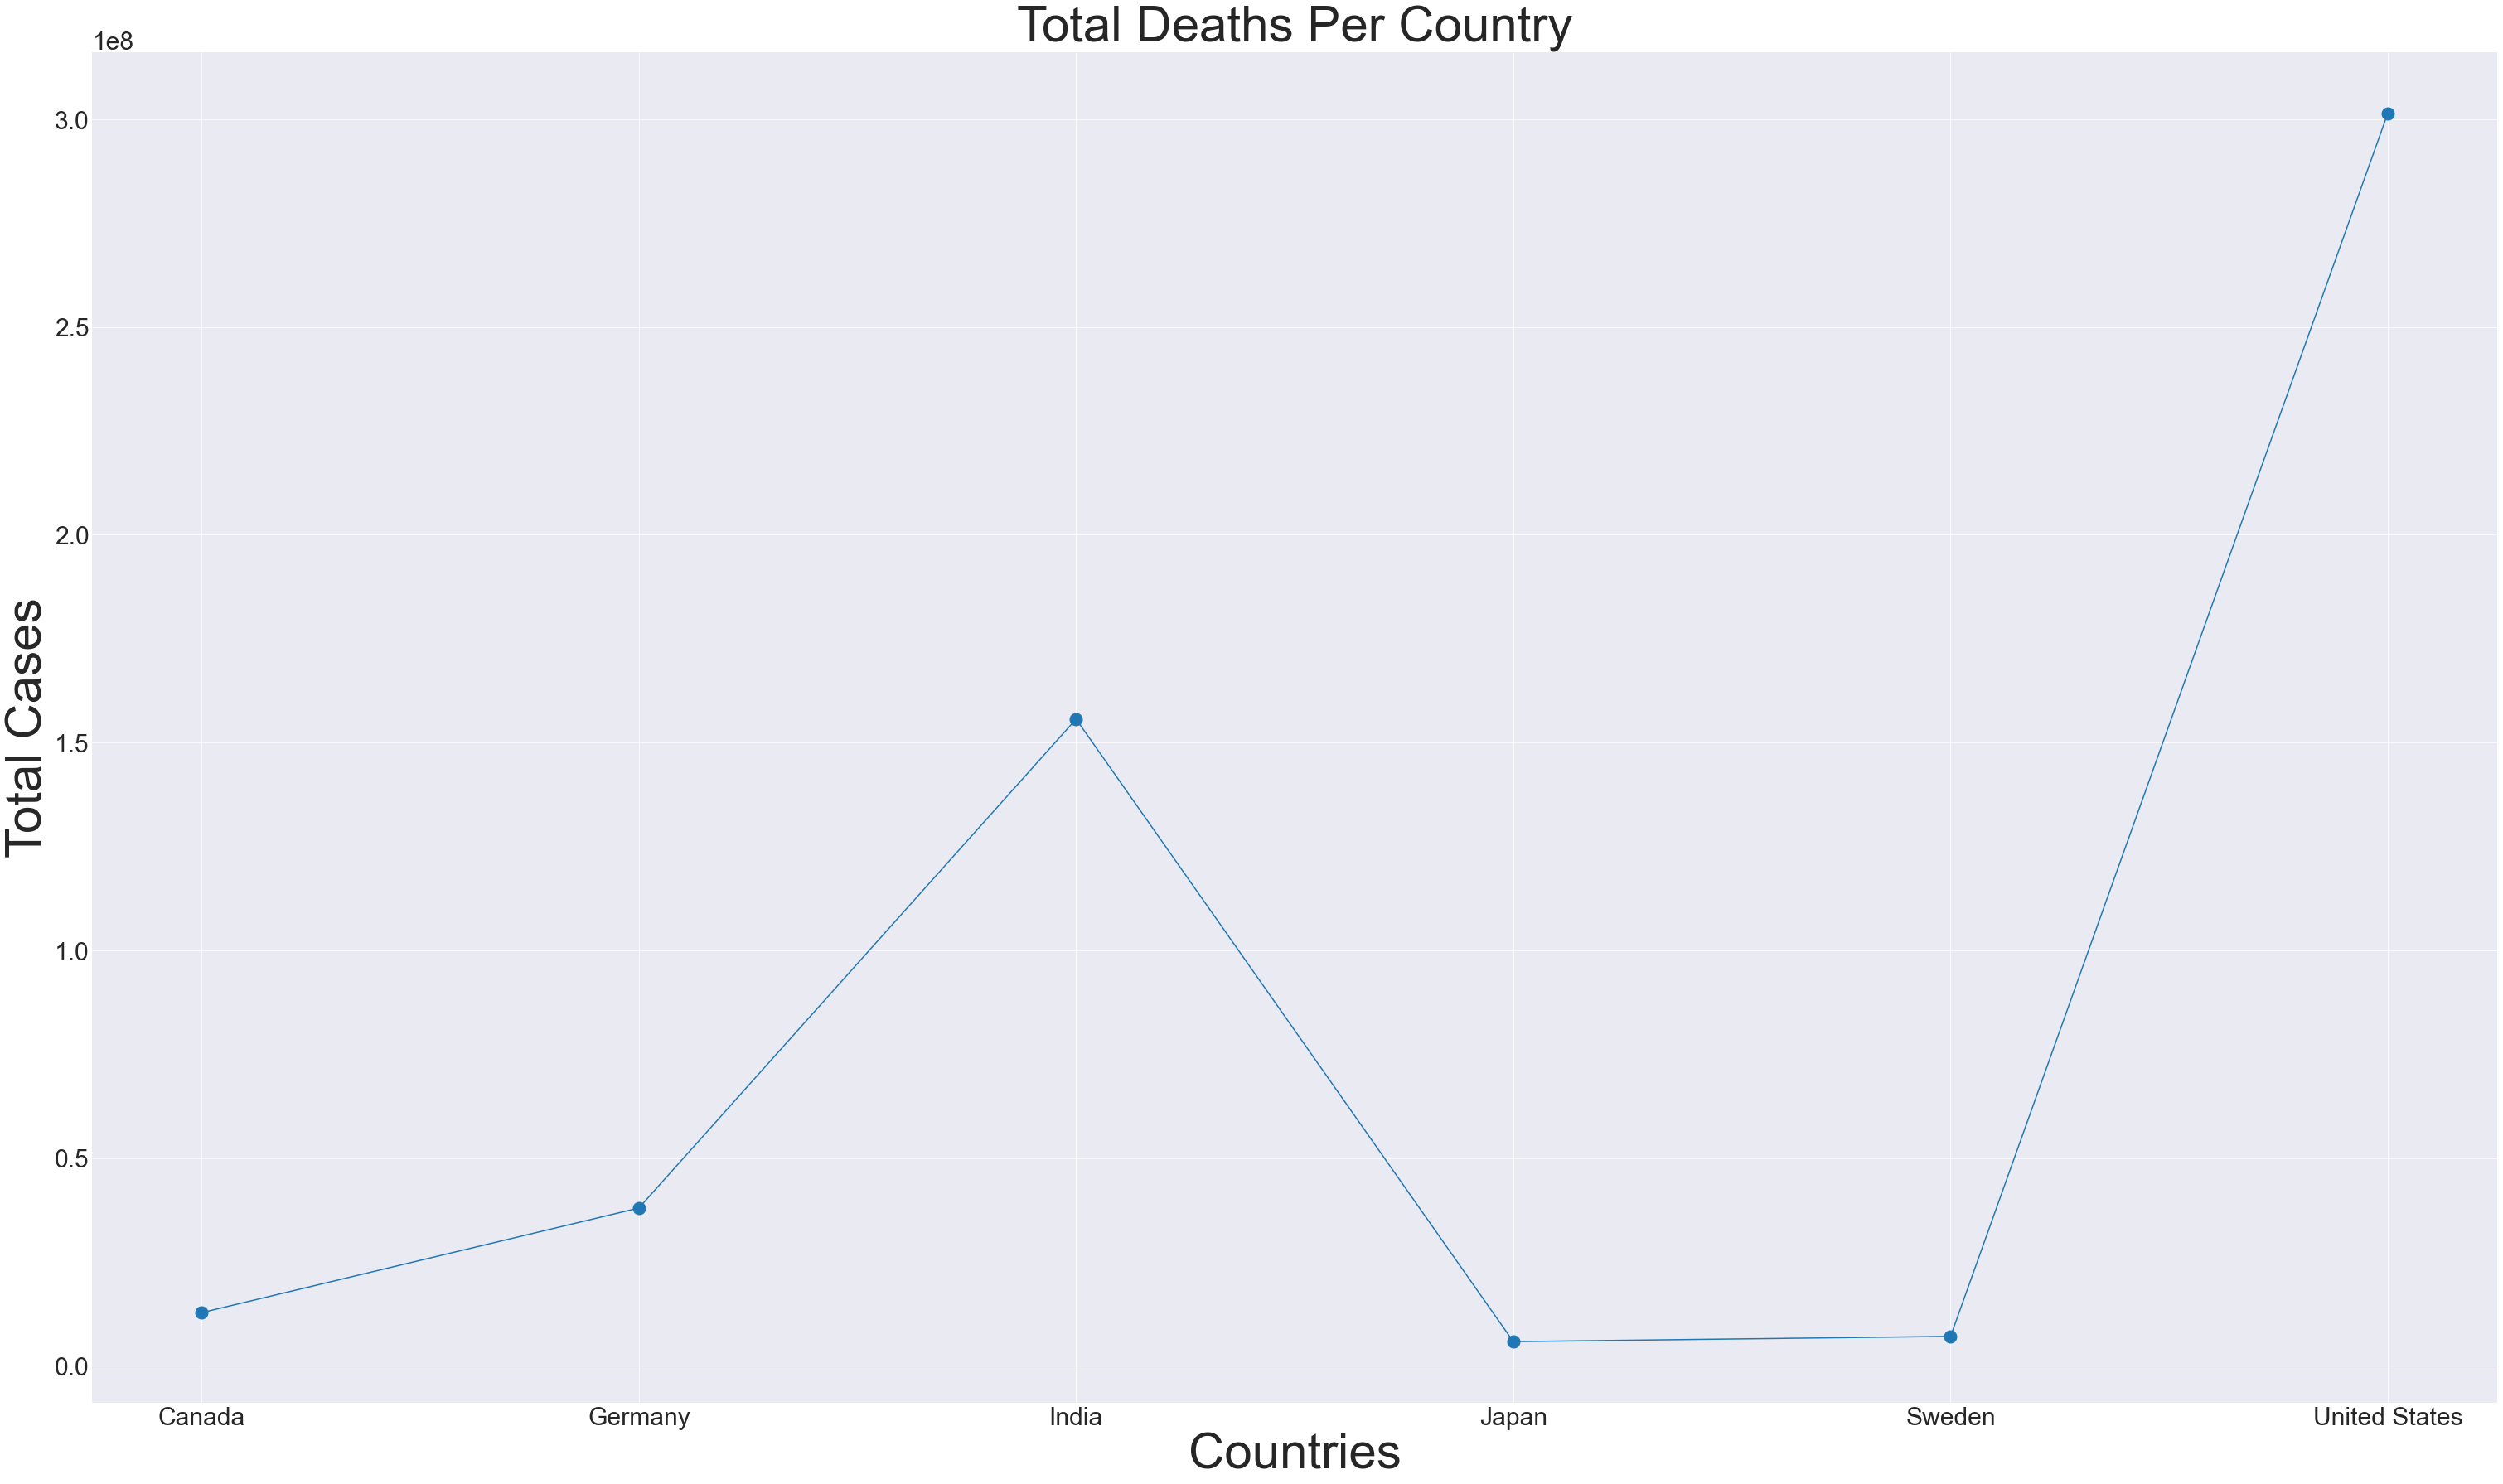

<Figure size 3744x2160 with 0 Axes>

In [16]:
# Plotting total Covid deaths per country
plt.plot(group_six_deaths_df[["total_deaths"]], marker = 'o')
plt.title('Total Deaths Per Country', fontsize=60)
plt.xlabel('Countries', fontsize=60)
plt.ylabel('Total Cases', fontsize=60)
plt.grid(True)
plt.show()
plt.savefig("Deaths_by_Countries1.png")

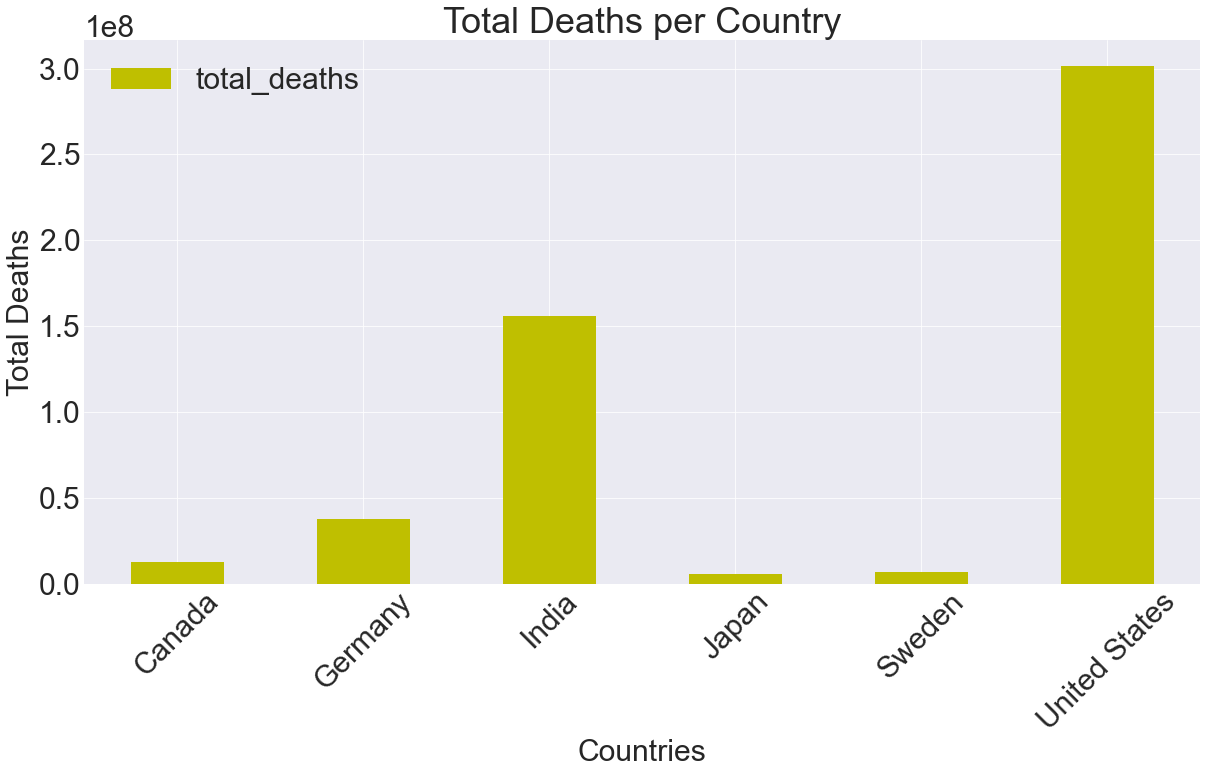

<Figure size 3744x2160 with 0 Axes>

In [17]:
# Generate a bar plot showing the total covid deaths by country.
group_six_deaths_df.plot(kind="bar", color="y", figsize=(20,10), rot=45)
plt.title("Total Deaths per Country")
plt.ylabel("Total Deaths")
plt.xlabel("Countries")
plt.rc("font", size=30)
plt.show()
plt.tight_layout()


In [18]:
# Concatenating total cases and total deaths of the six countries into one data frame
group_six_cases_deaths_df = pd.concat([group_six_cases_df, group_six_deaths_df], axis=1)
group_six_cases_deaths_df

,total_cases,total_deaths
location,,
Canada,6.334565e+08,12795792.0
Germany,1.800036e+09,37976890.0
India,1.163488e+10,155657094.0
Japan,4.594657e+08,5824450.0
Sweden,4.496405e+08,7088061.0
United States,1.733343e+10,301478150.0


No handles with labels found to put in legend.


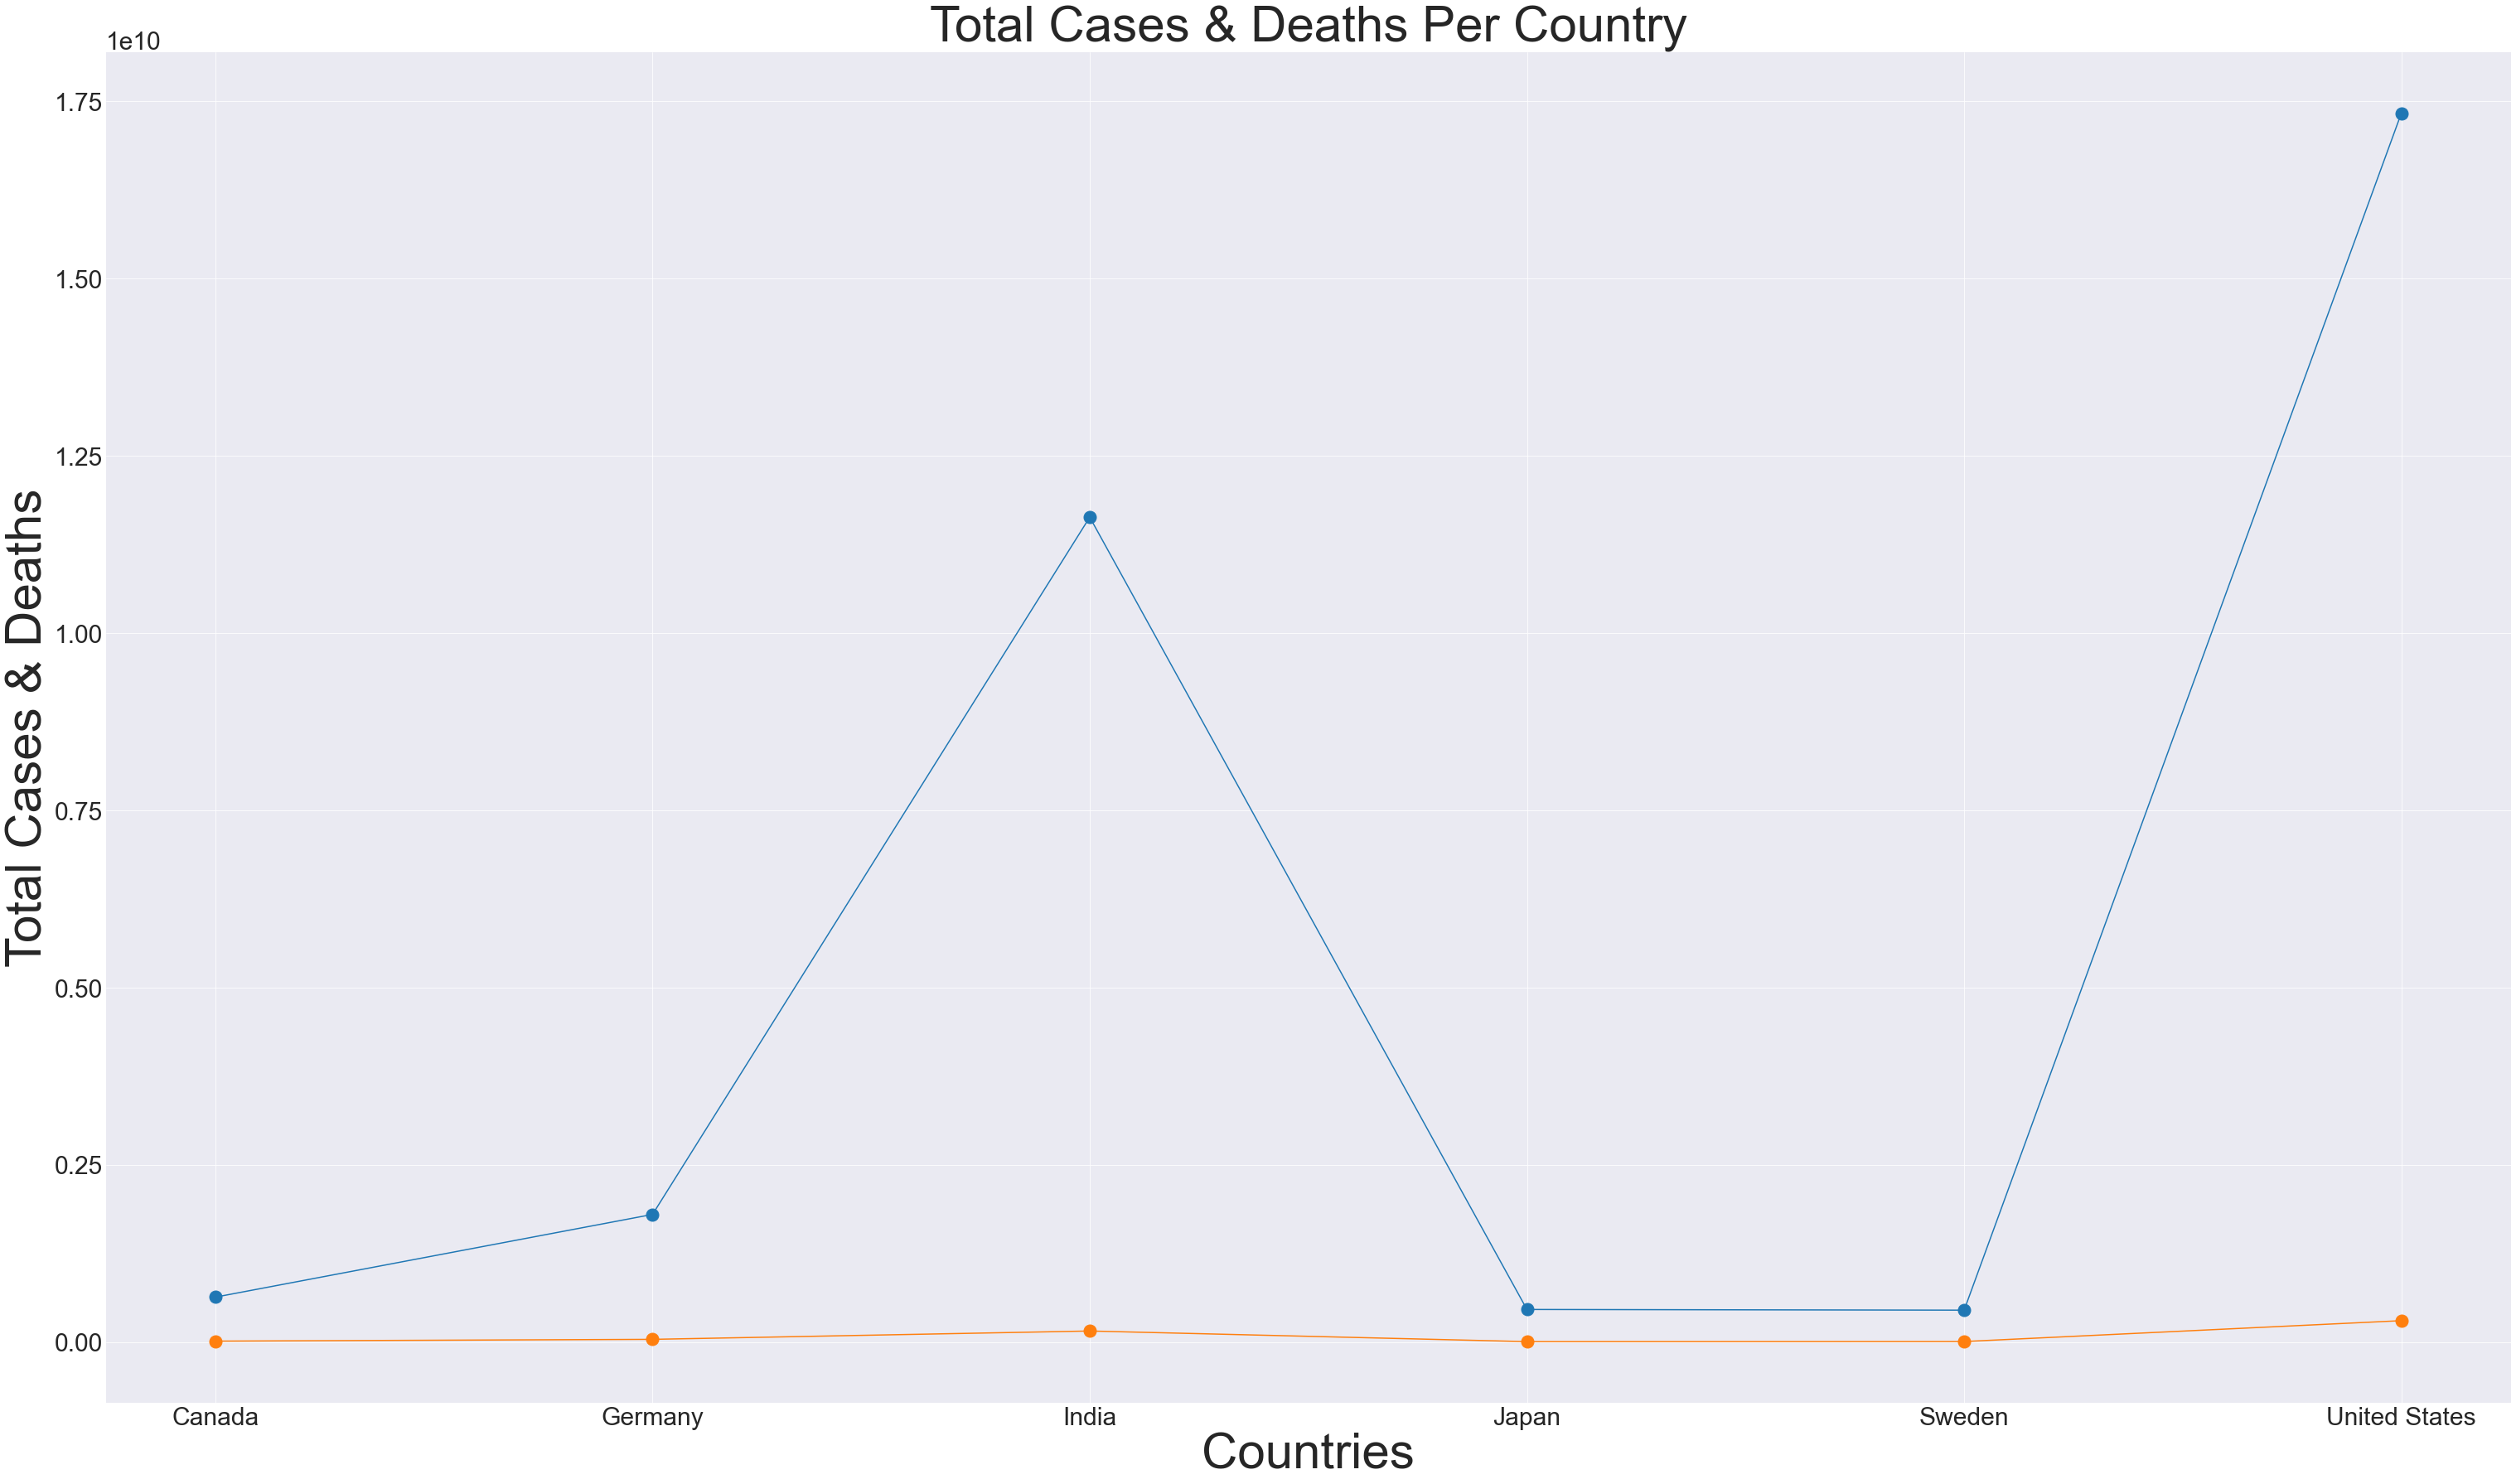

<Figure size 3744x2160 with 0 Axes>

In [19]:
# Generate a line graph showing the total covid cases and deaths by country.
plt.plot(group_six_cases_deaths_df[["total_cases","total_deaths"]], marker = 'o')
plt.title('Total Cases & Deaths Per Country', fontsize=60)
plt.xlabel('Countries', fontsize=60)
plt.ylabel('Total Cases & Deaths', fontsize=60)
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("Cases_&_Deaths_by_Countries1.png")

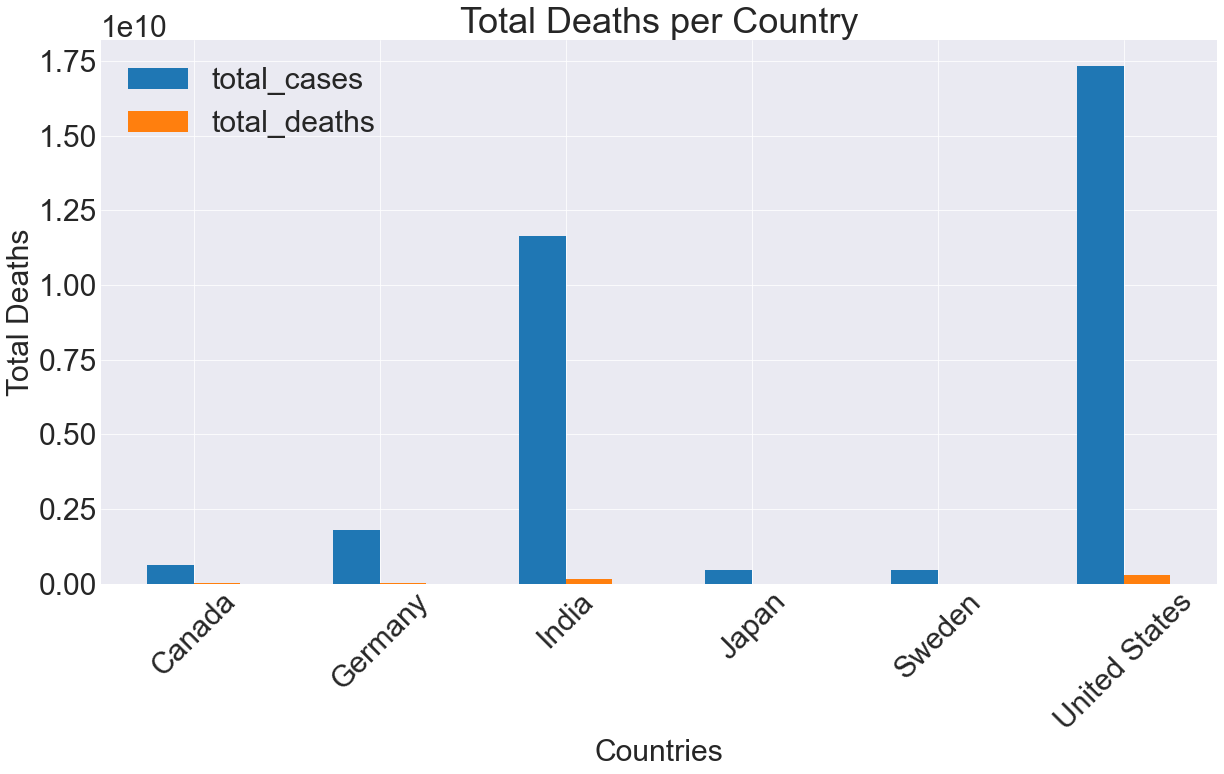

<Figure size 3744x2160 with 0 Axes>

In [20]:
# Generate a bar plot showing the total covid deaths by country.
group_six_cases_deaths_df.plot(kind="bar", figsize=(20,10), rot=45)
plt.title("Total Deaths per Country")
plt.ylabel("Total Deaths")
plt.xlabel("Countries")
plt.rc("font", size=30)
plt.show()
plt.tight_layout()


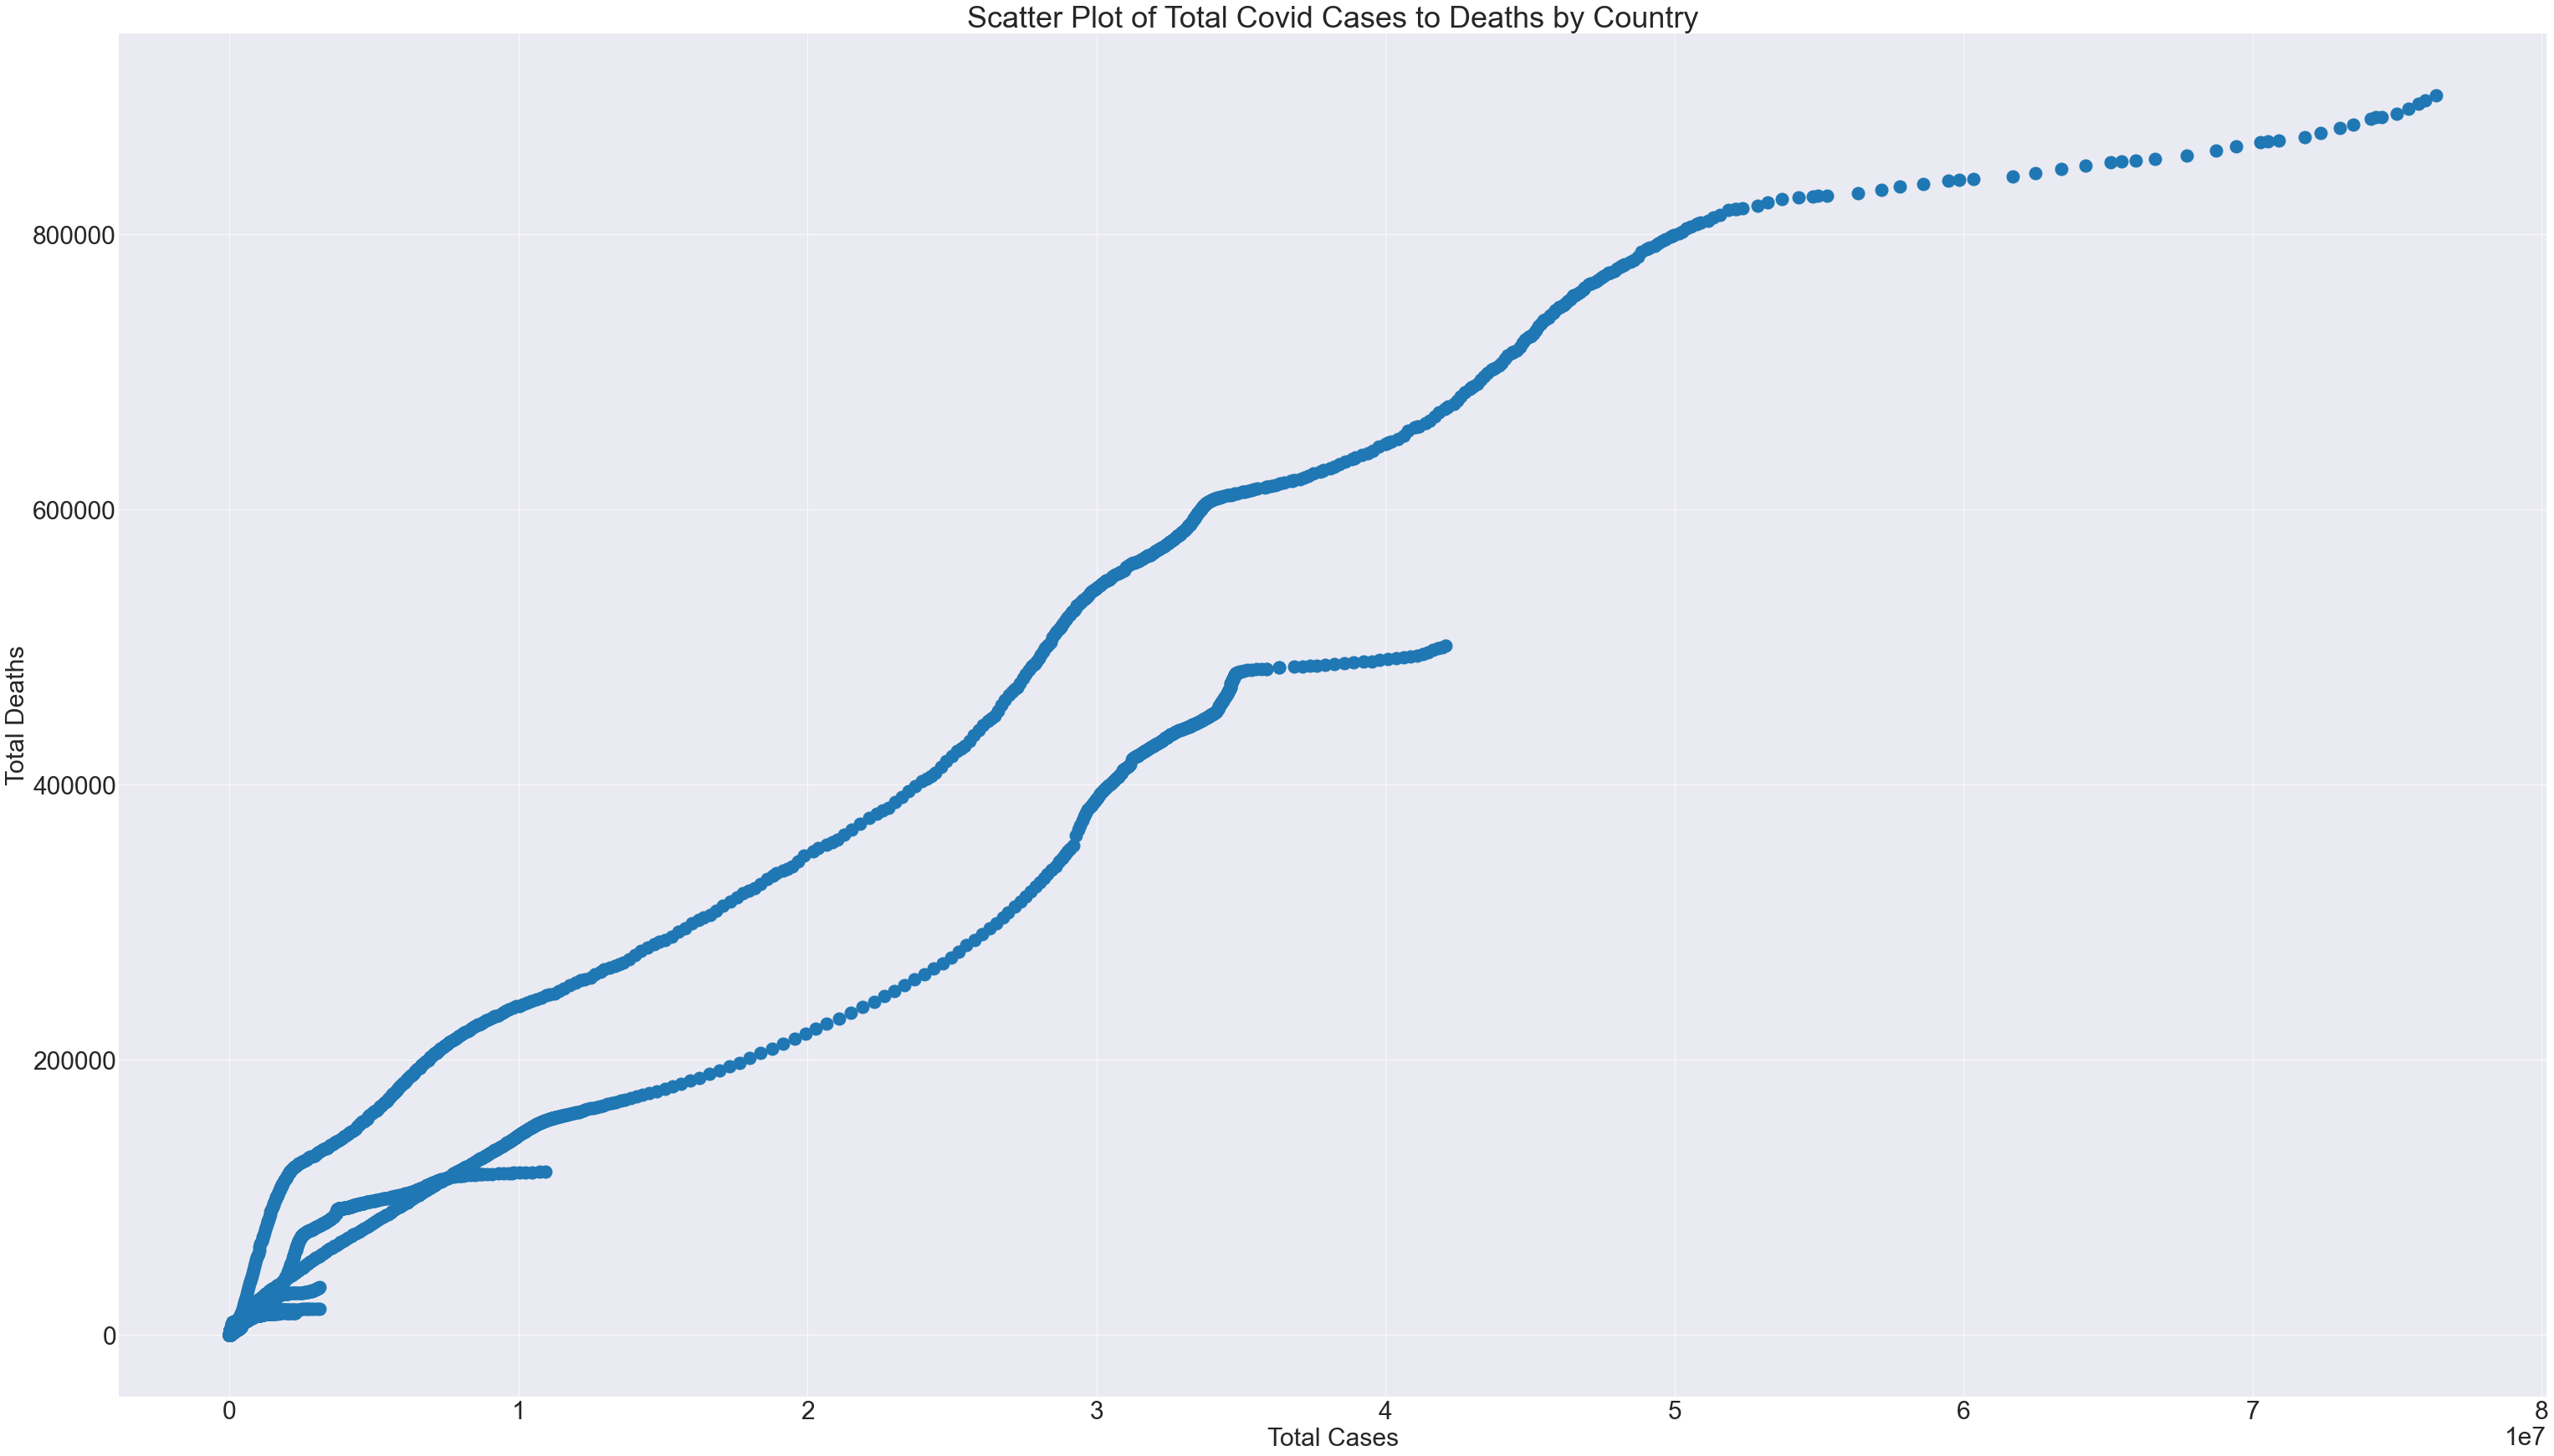

In [21]:
# Generating a scatter plot of cases vs. deaths

cases = global_six_df["total_cases"]
deaths = global_six_df["total_deaths"]
plt.scatter(cases, deaths)
plt.title("Scatter Plot of Total Covid Cases to Deaths by Country")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")

plt.show()

In [22]:
# Grouping by location, total_cases, and population to help graph infection rate per country over population density
group_six_pop_density_df = global_six_df.groupby(["location"]).agg({"population_density":"sum"})

group_six_pop_density_df

,population_density
location,
Canada,2991.417
Germany,175391.840
India,331958.803
Japan,259094.610
Sweden,18167.730
United States,26527.960


In [23]:
# Grouping by location, total_cases, and population to help graph infection rate per country over population density
group_six_pop_df = global_six_df.groupby(["location"]).agg({"population":"sum"})
group_six_pop_df['pop_million'] = group_six_pop_df['population']/1000000
group_six_pop_df

,population,pop_million
location,,
Canada,2.820832e+10,2.820832e+04
Germany,6.208635e+10,6.208635e+04
India,1.026942e+12,1.026942e+06
Japan,9.390784e+10,9.390784e+04
Sweden,7.467717e+09,7.467717e+03
United States,2.480217e+11,2.480217e+05


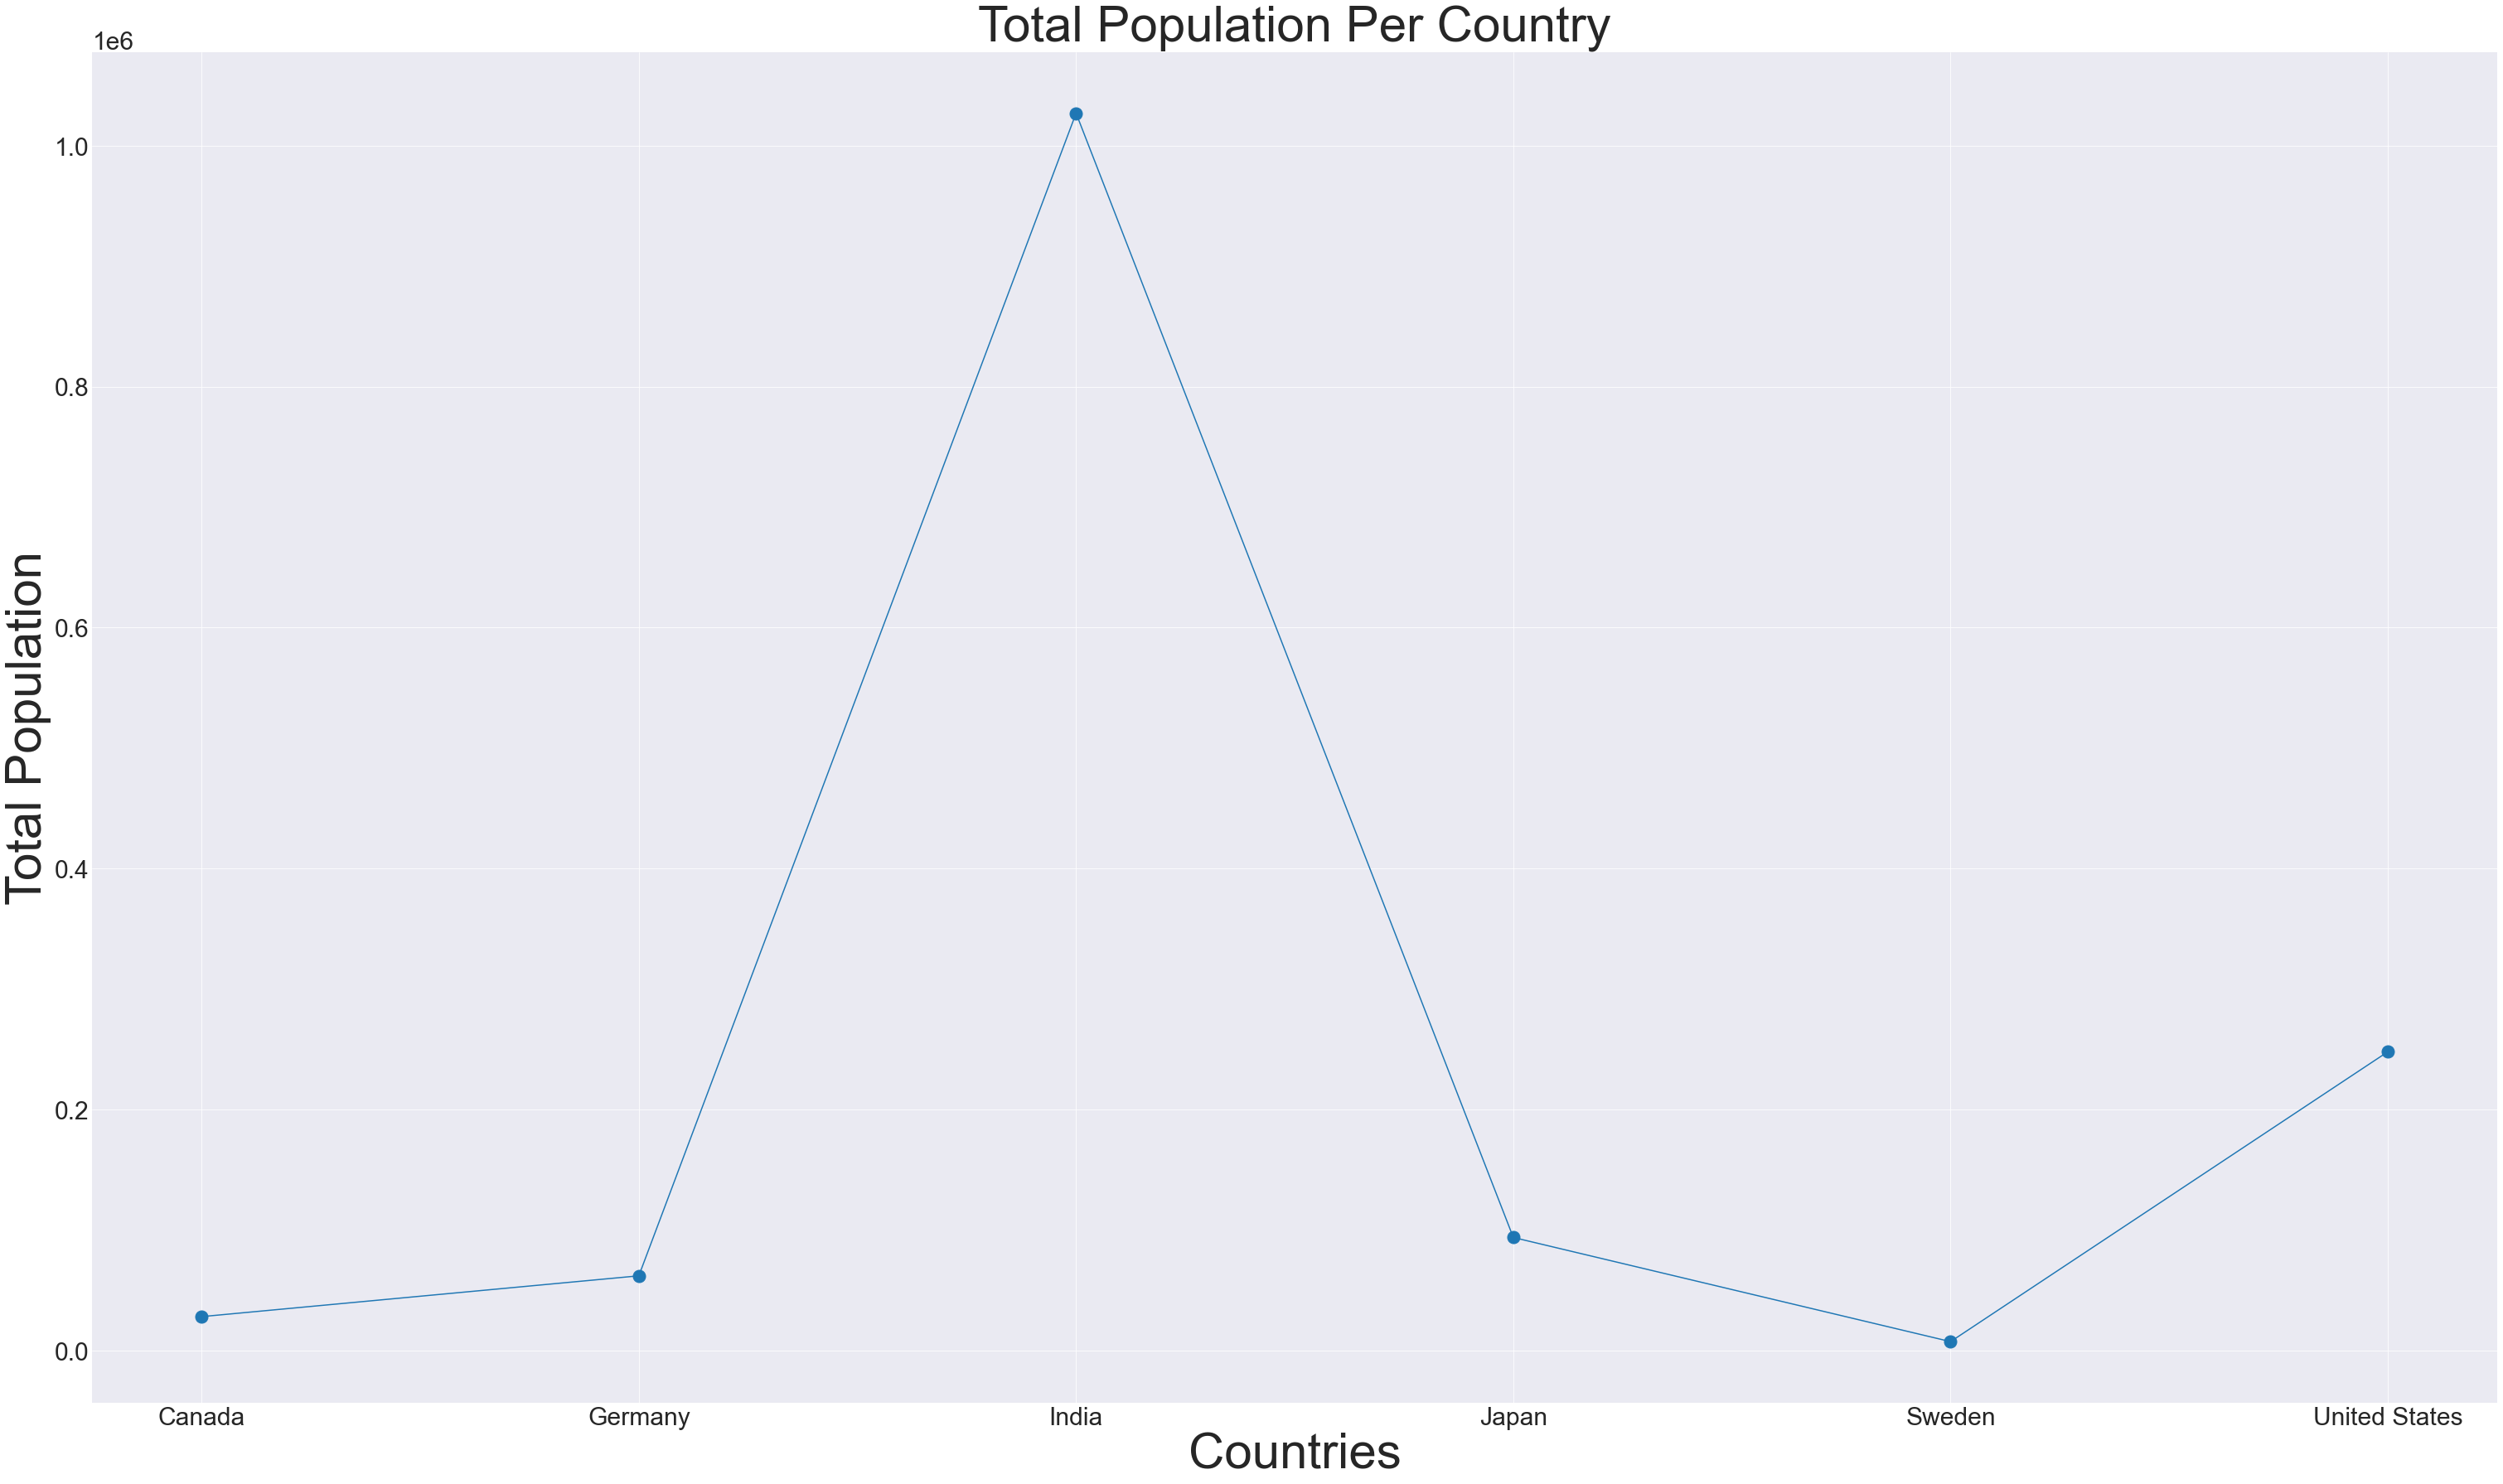

<Figure size 3744x2160 with 0 Axes>

In [24]:
# Generate a line graph showing the total covid cases and deaths by country.
plt.plot(group_six_pop_df[["pop_million"]], marker = 'o')
plt.title('Total Population Per Country', fontsize=60)
plt.xlabel('Countries', fontsize=60)
plt.ylabel('Total Population', fontsize=60)

plt.grid(True)
plt.show()
plt.savefig("Total_Population_by_Countries1.png")

In [25]:
# Putting population, cases and deaths into one dataframe for graphing
pop_cases_deaths_df = pd.concat([group_six_cases_df, group_six_deaths_df,group_six_pop_density_df], axis=1)

pop_cases_deaths_df

,total_cases,total_deaths,population_density
location,,,
Canada,6.334565e+08,12795792.0,2991.417
Germany,1.800036e+09,37976890.0,175391.840
India,1.163488e+10,155657094.0,331958.803
Japan,4.594657e+08,5824450.0,259094.610
Sweden,4.496405e+08,7088061.0,18167.730
United States,1.733343e+10,301478150.0,26527.960


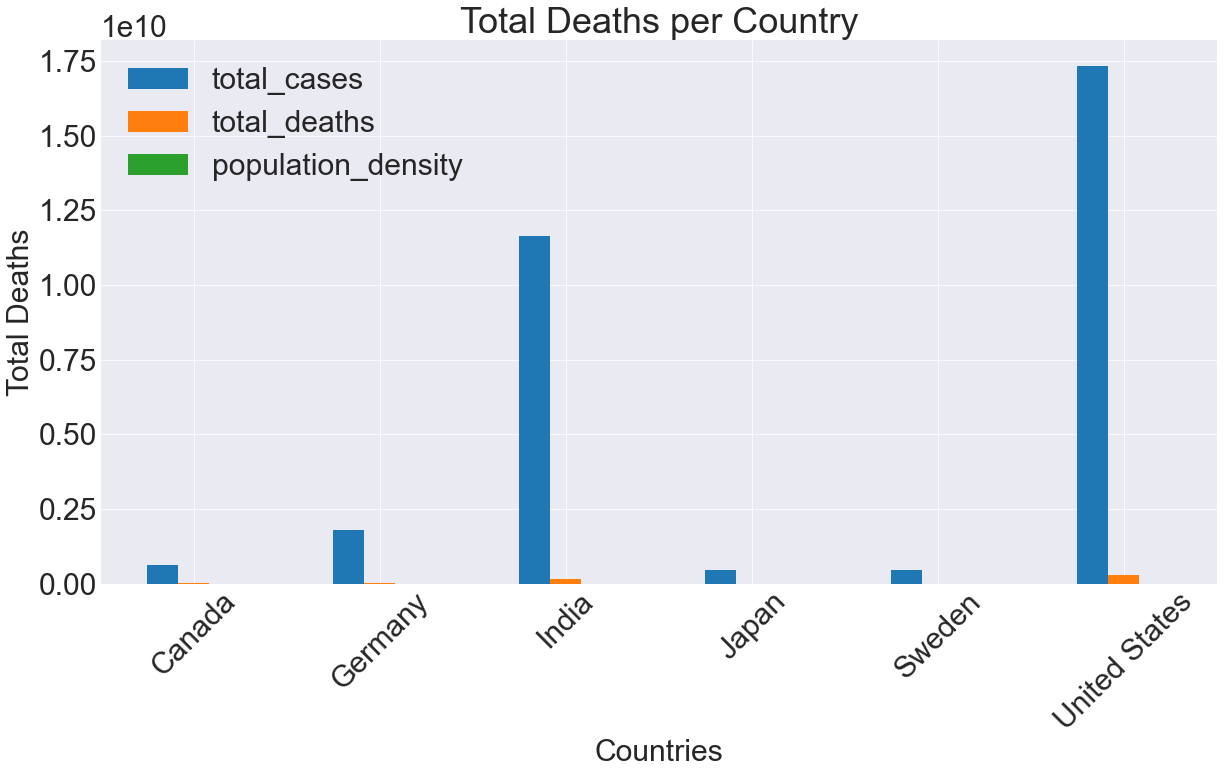

<Figure size 3744x2160 with 0 Axes>

In [26]:
# Generate a bar plot showing the total covid cases, deaths by population density of each country.
pop_cases_deaths_df.plot(kind="bar", figsize=(20,10), rot=45)
plt.title("Total Deaths per Country")
plt.ylabel("Total Deaths")
plt.xlabel("Countries")
plt.rc("font", size=30)
plt.show()
plt.tight_layout()


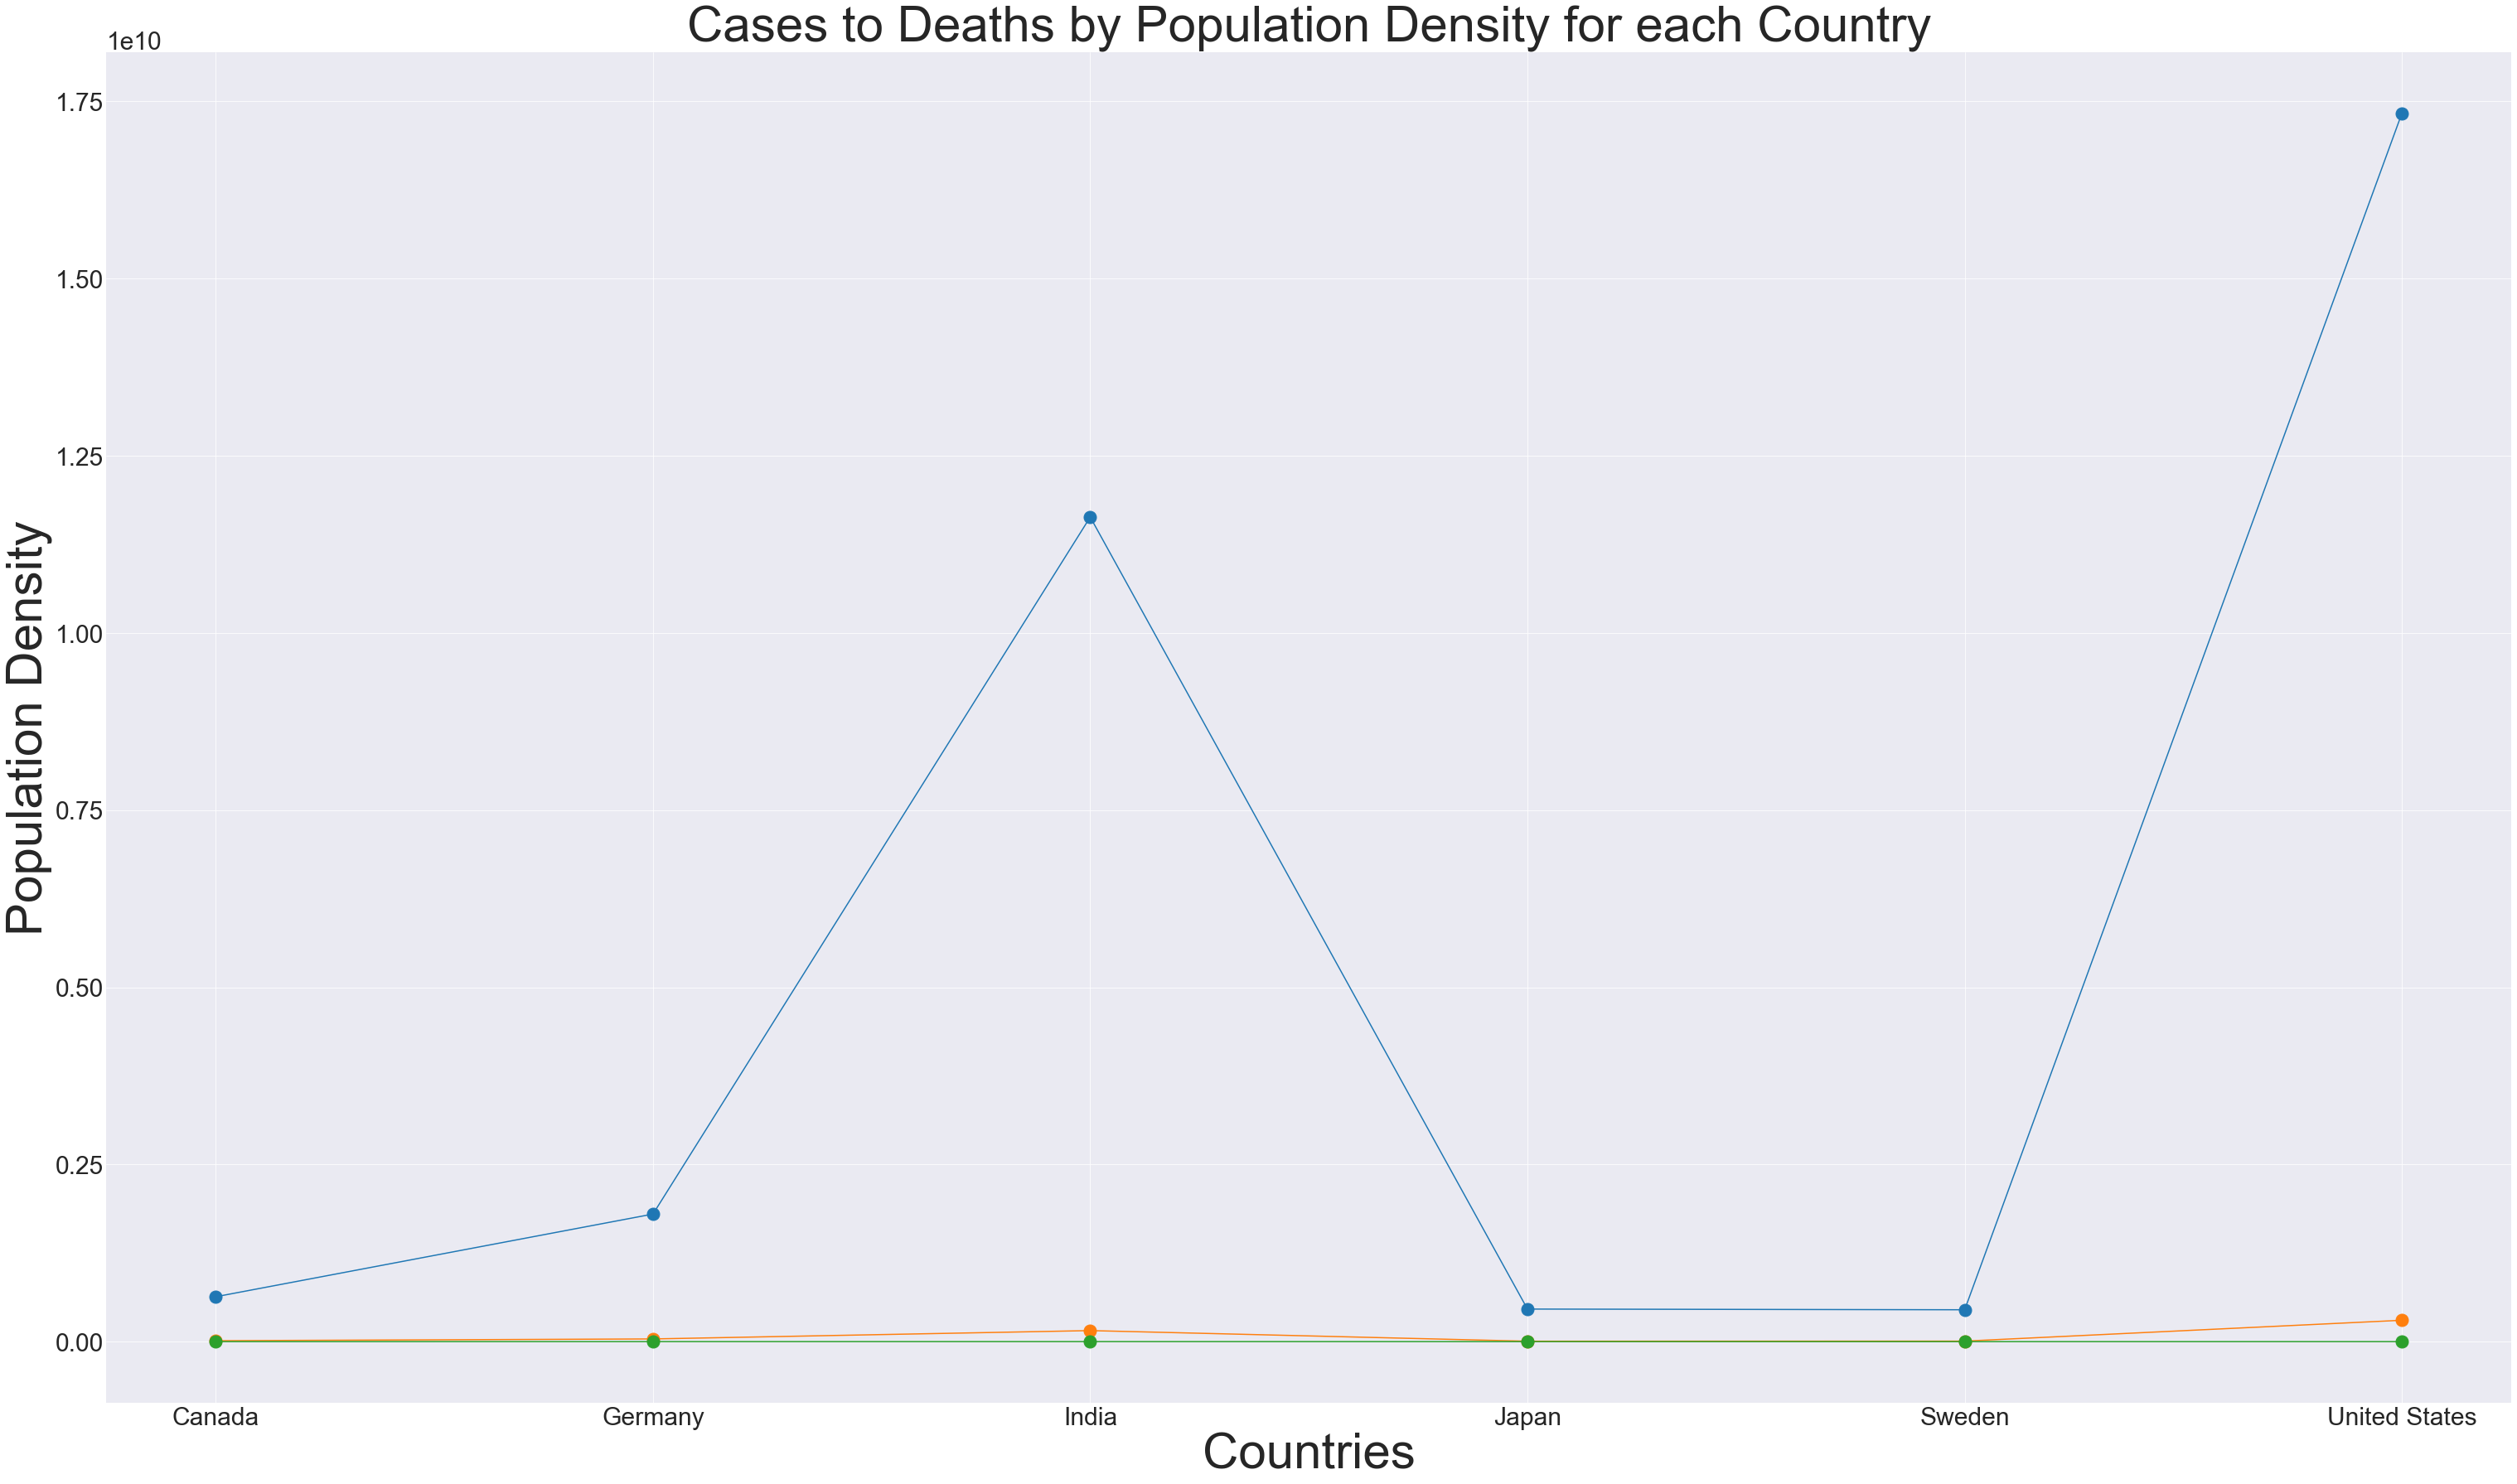

In [27]:
# Plotting total cases to deaths by population density for each country
plt.plot(pop_cases_deaths_df[["total_cases", "total_deaths", "population_density"]], marker = 'o')
plt.title('Cases to Deaths by Population Density for each Country', fontsize=60)
plt.xlabel('Countries', fontsize=60)
plt.ylabel('Population Density', fontsize=60)
plt.grid(True)
plt.show()

In [28]:
# Putting population, cases and population into one dataframe for graphing
pop_cases_pop_df = pd.concat([group_six_cases_df, group_six_pop_df, ], axis=1)

pop_cases_pop_df

,total_cases,population,pop_million
location,,,
Canada,6.334565e+08,2.820832e+10,2.820832e+04
Germany,1.800036e+09,6.208635e+10,6.208635e+04
India,1.163488e+10,1.026942e+12,1.026942e+06
Japan,4.594657e+08,9.390784e+10,9.390784e+04
Sweden,4.496405e+08,7.467717e+09,7.467717e+03
United States,1.733343e+10,2.480217e+11,2.480217e+05


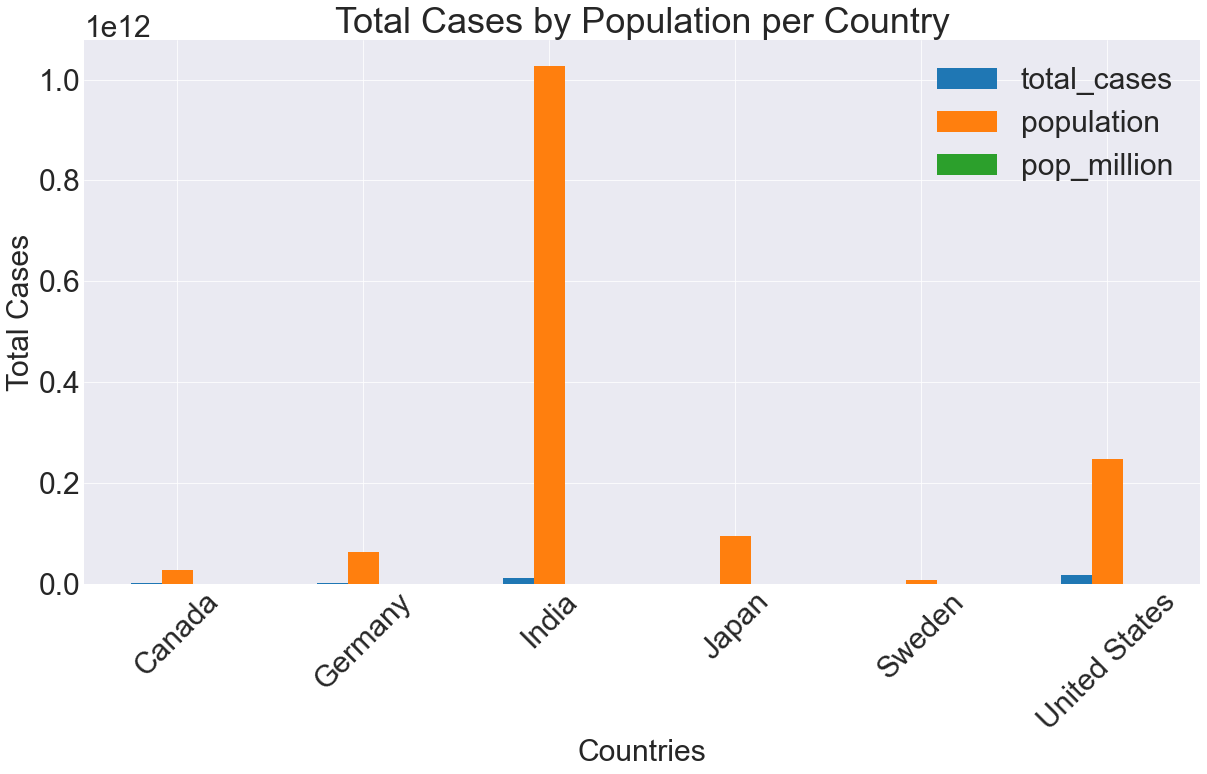

<Figure size 3744x2160 with 0 Axes>

In [29]:
# Generate a bar plot showing the total covid cases by population density of each country.

pop_cases_pop_df.plot(kind="bar", figsize=(20,10), rot=45)
plt.title("Total Cases by Population per Country")
plt.ylabel("Total Cases")
plt.xlabel("Countries")
plt.rc("font", size=30)
plt.legend()
plt.show()
plt.tight_layout()


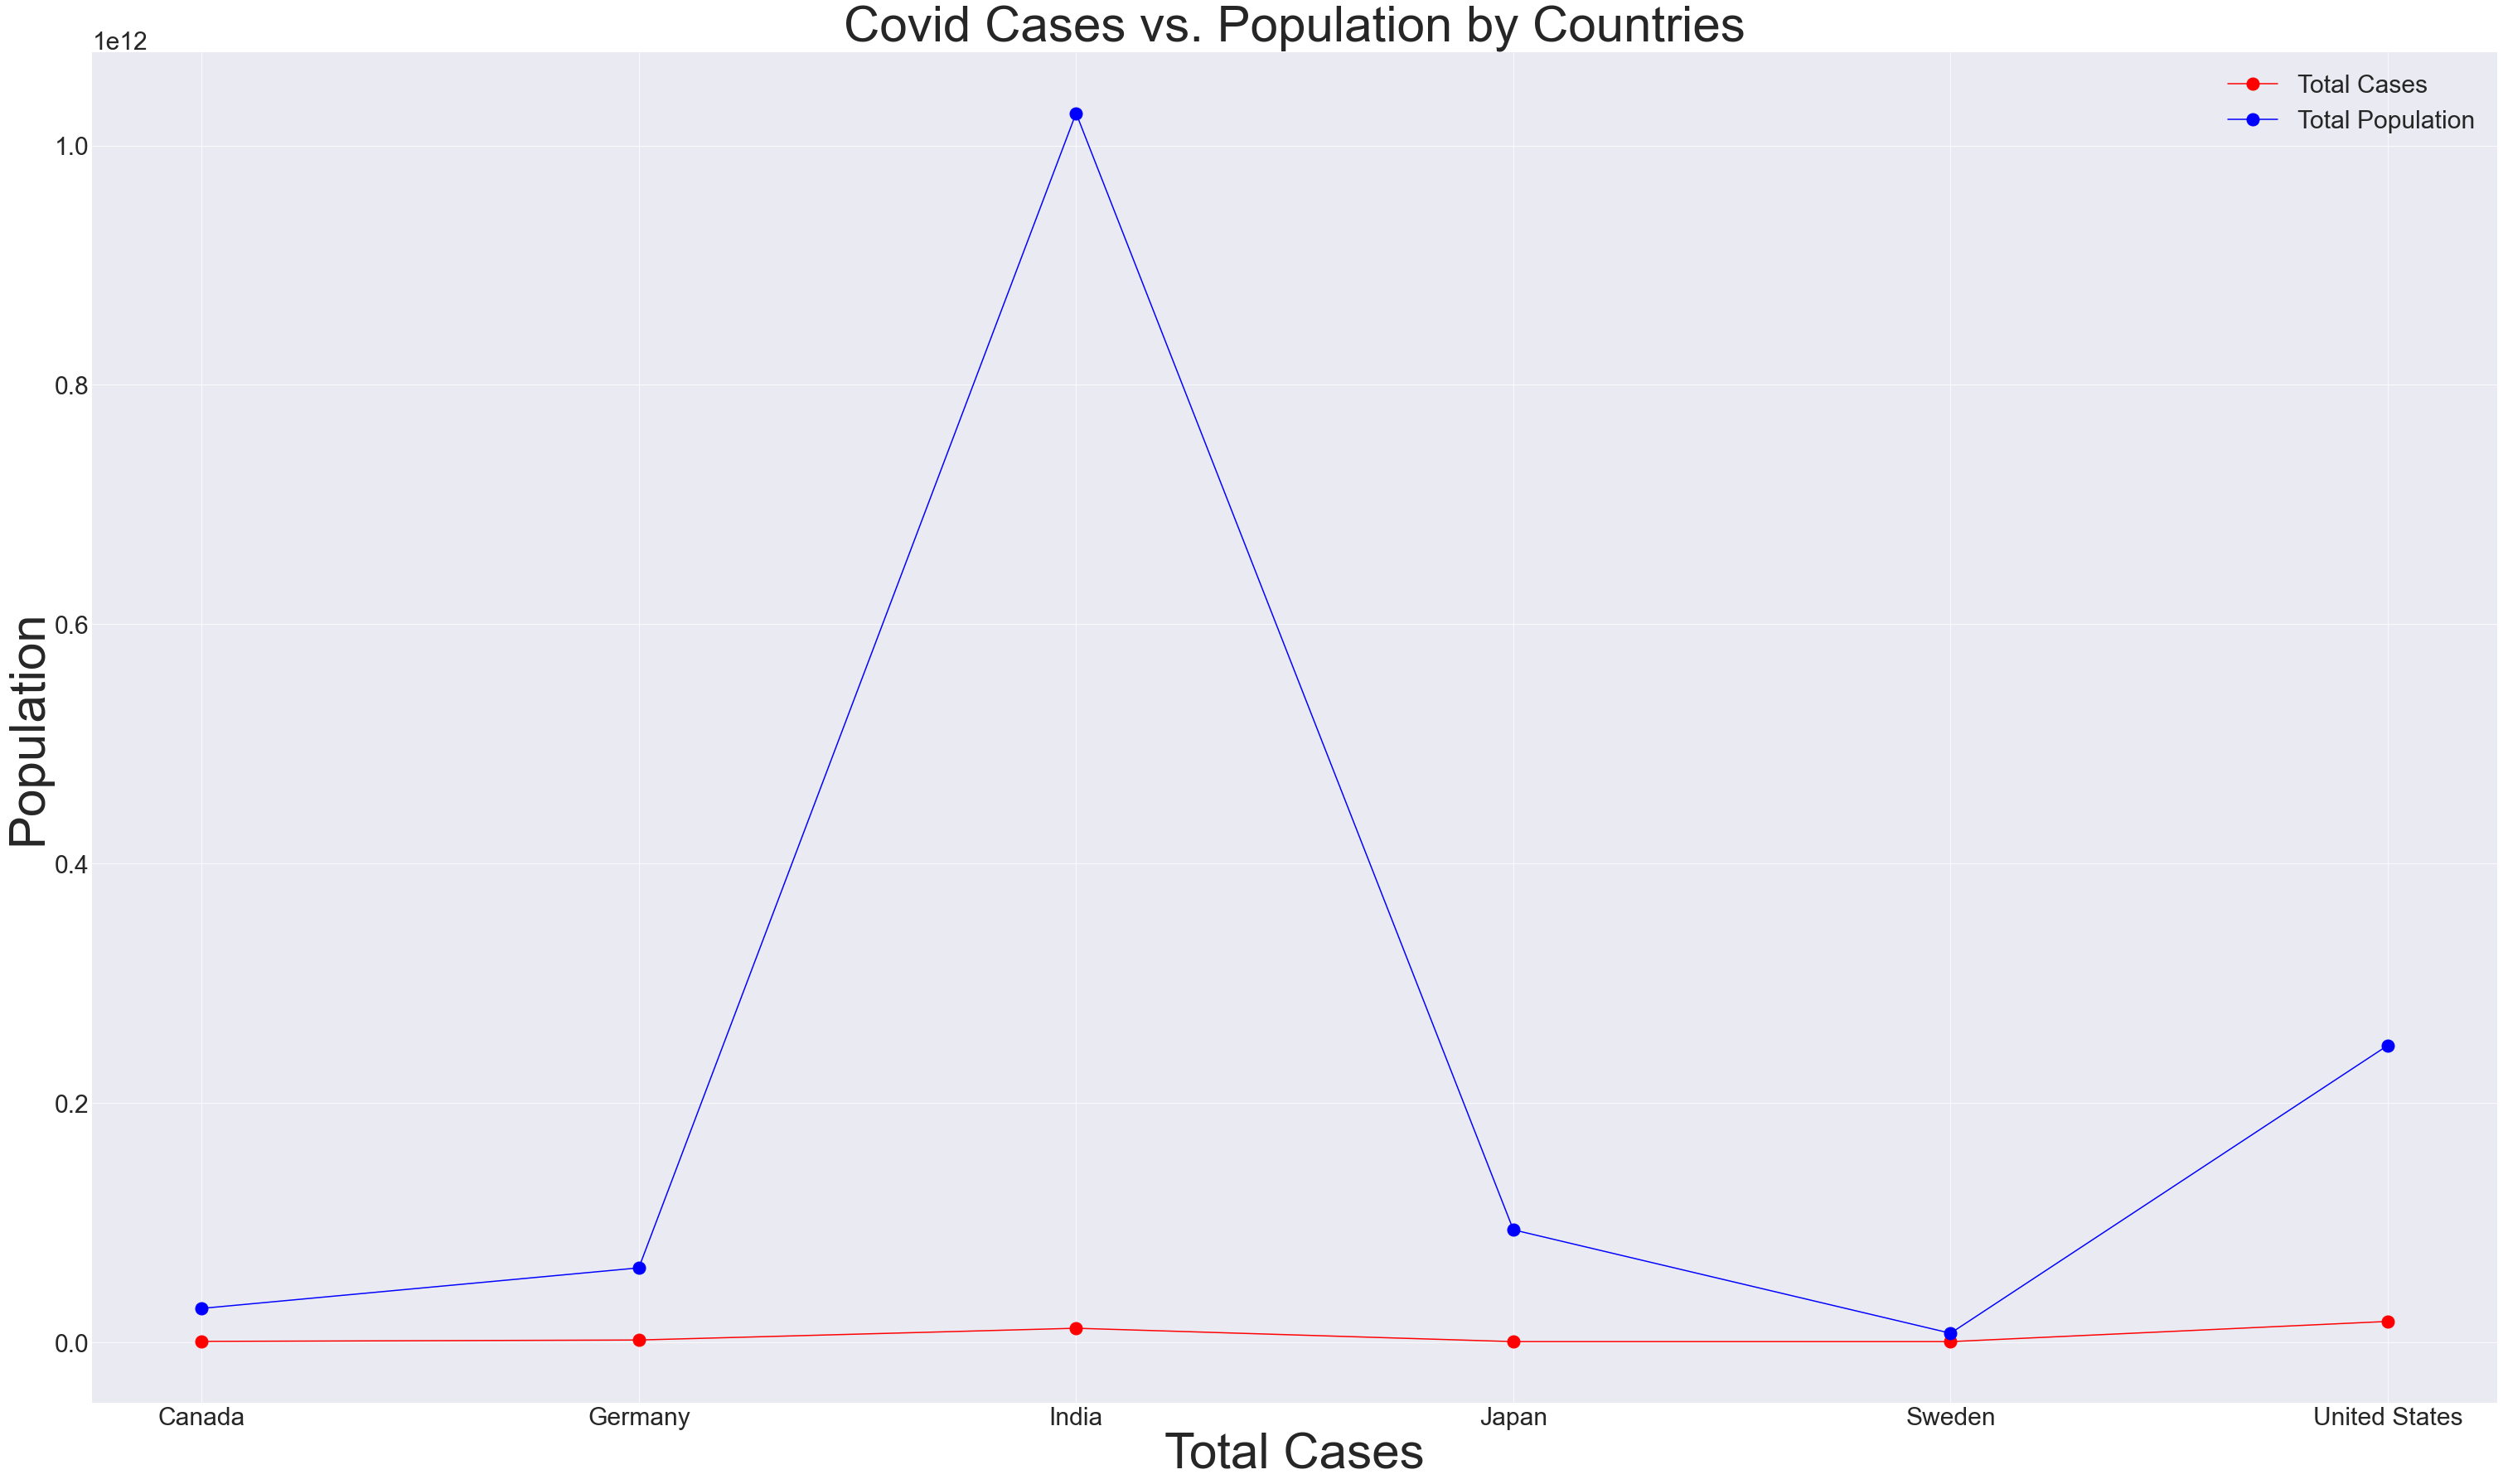

<Figure size 3744x2160 with 0 Axes>

In [30]:
#lt.plot(pop_cases_pop_df[["total_cases", "population"]], marker = 'o')

plt.plot(pop_cases_pop_df[["total_cases"]], color="r", marker='o', label="Total Cases")
plt.plot(pop_cases_pop_df[["population"]], color="b", marker='o', label="Total Population")
plt.title('Covid Cases vs. Population by Countries', fontsize=60)
plt.xlabel('Total Cases', fontsize=60)
plt.ylabel('Population', fontsize=60)
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

plt.savefig("Cases_Population_by_Countries.2.png")

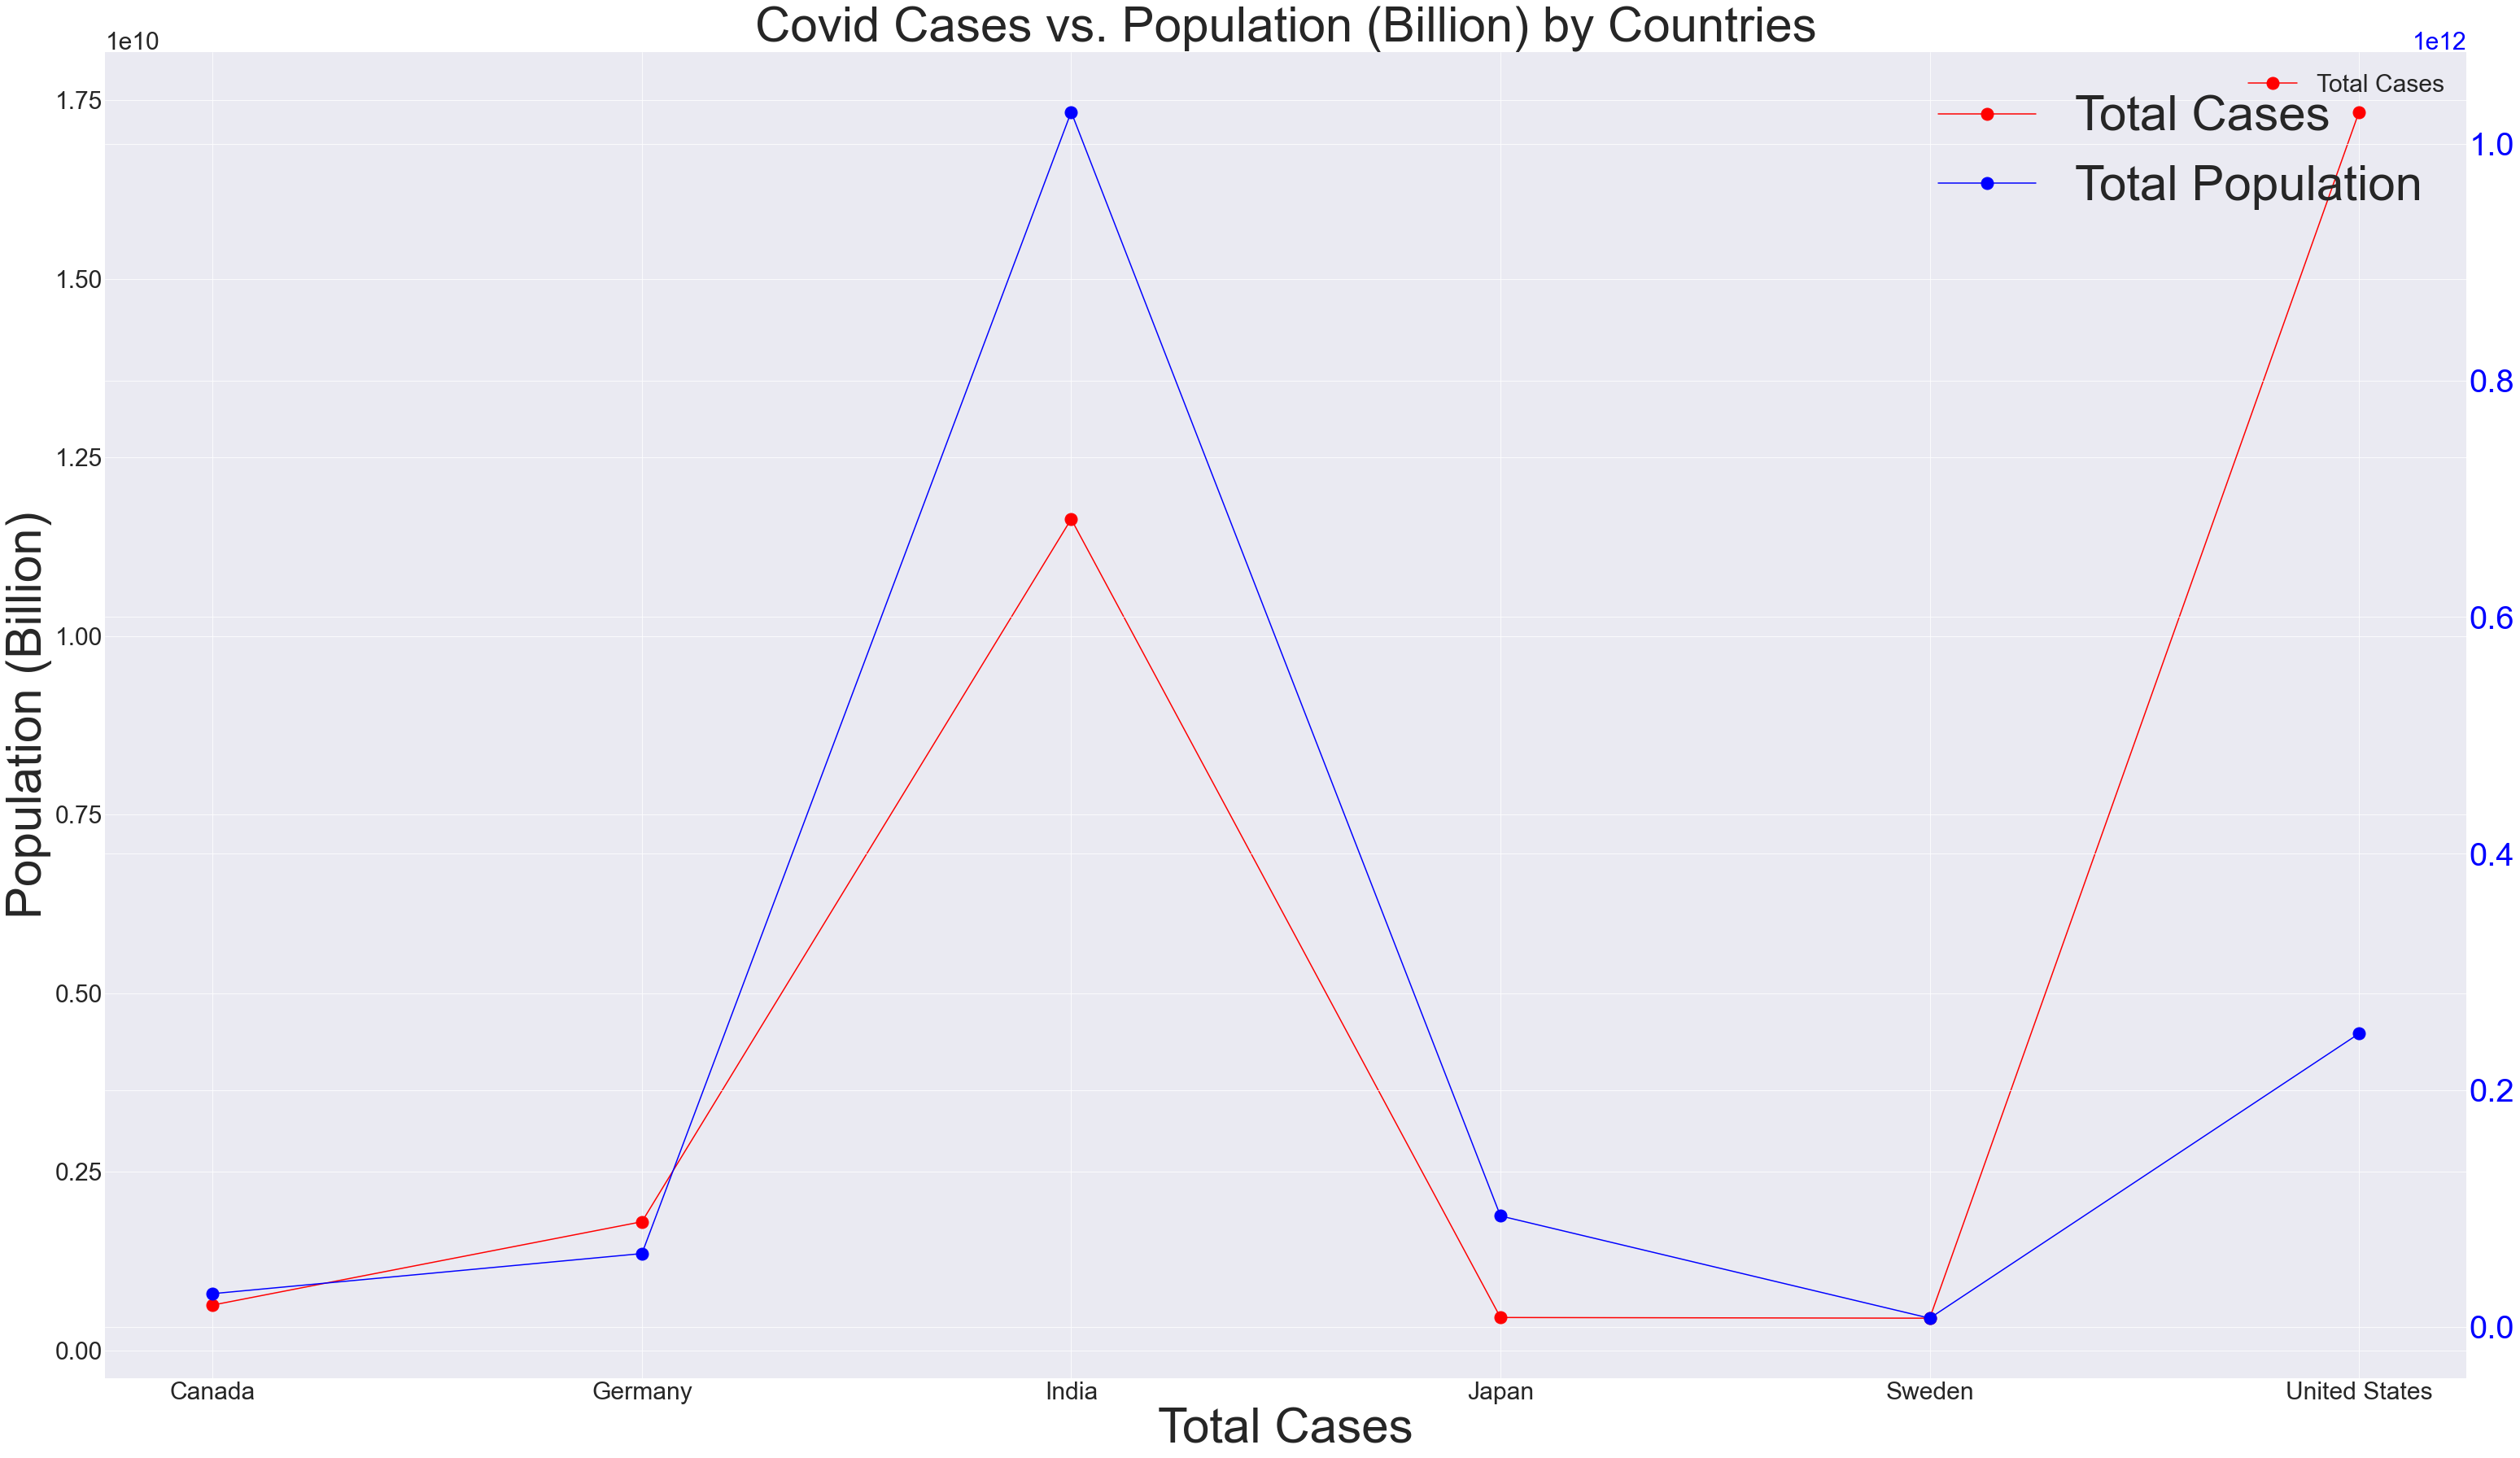

In [32]:
# Trying to get the graphs on two different axes - Covid Cases vs. Population by country
fig, ax=plt.subplots()
plt.plot(pop_cases_pop_df[["total_cases"]], color="r", marker='o', label="Total Cases")
#plt.plot(group_six_pop_df[["population"]], color="b", marker='o', label="Total Population")
plt.title('Covid Cases vs. Population (Billion) by Countries', fontsize=60)
plt.xlabel('Total Cases', fontsize=60)
plt.ylabel('Population (Billion)', fontsize=60)
plt.grid(True)
plt.legend(loc="upper right")
#plt.show()
ax2 =ax.twinx()
#ax2.plot(x2_six,linewidth=4,color="b",label='Total Cases ')
plt.plot(group_six_pop_df[["population"]], color="b", marker='o', label="Total Population")
ax2.tick_params('y', colors='b',labelsize=40)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best',fontsize=60)
ax2.grid(True)
plt.savefig("Cases_Population_by_Countries.2.1.png")